# Task 1 - *"The Fingerprint"*

Here, I'm going to analyse the the *"mathematics of authorship"*, i.e. how to mathematically differentiate between human and AI generated text. I have done a review into various methods of mathematically differentiate between 2 texts, and what generally tends to stand out in AI.

As such, I have met the baseline requirements given in the document, and additionally added a few of my own tests for mathematical distinctions. Every single test I do will be thoroughly explained in the markdown pieces before each codeblock.

## Lexical Richness

From my understanding, lexical richness is a mathematical distinction which regards the distinction of vocabulary. Generally, LLM's are trained on datasets with billions of tokens. Their algorithms usually rely on temperature scaled sampling, so the LLM's are statistically incentivised to generate the same token. This is called a *"lexical plateau."* We do not expect to see such a plateau as much in the human written text. 

## 1. Type-Token Ratios (TTR)

**What is it:** The ratio of unique words to total words in a given text.  

**Why are we using it?**  
It seems to be quite a good proxy for lexical richness. In human writing, the TTR is a dynamic function which is based on the intention of the writer. A non-fiction highly academic book will likely have a high TTR, whereas a children's story will have a low one.
My main point is that you can expect there to be diversity for the human authors.

For AI though, it's different. LLM's tend to restrict themselves to smaller vocabulary samples and continuously use that. For instance, in the domain of journalistic writing, human articles typically maintain a standard TTR in the range of 0.53 to 0.58. In contrast, AI-generated counterparts consistently fall into a lower band, typically between 0.45 and 0.52.<sup>[2]</sup>

Where I learned about type-token ratios:
1. [Culda et al., 2024](https://www.tandfonline.com/doi/full/10.1080/09540091.2025.2507183?src#d1e751) speaks about TTR and evaluates it robustly against human-written text. This can be seen primarily in section 4.4 of the paper. They discuss the results of this in section 6 of the paper, stating *For instance, GPT-Neo and BloomZ produced fewer unique words and had a lower TTR compared to human-authored texts. In contrast, Wikipedia, blog and scientific content exhibited a larger word count and more diverse syntactic patterns, reflecting the authors’ ability to incorporate personal experiences, emotional undertones, and stylistic subtleties.*
2. [Tran et al., 2024](https://www.mdpi.com/2073-431X/13/12/328?utm_source=researchgate.net&utm_medium=article) speaks about how AI generated text varies from that of humans in terms of lexical richness. The above example I used about TTR of AI falling into a median lower band, is from here.

#### My Hypothesis

Texts produced by AI will show lower Type–Token Ratio, TTR than human-authored texts on average. That of class 1 and class 3 will be similar.  

I will use the Mann-Whitney U Test to test this hypothesis. This is a test comparing differences between two independent data classes to determine if they originate from the same distribution.

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

# Use relative path - works when notebook is in task-1/ directory
DATASET_DIR = Path('../dataset')
print(f"Using dataset directory: {DATASET_DIR.resolve()}")

def calculate_ttr(text):
    # Here, we calculate Type-Token Ratio for a given text.
    # TTR = (Number of unique words) / (Total number of words)
    # For example, in the sentence "The cat chased the mouse and the cat caught the mouse."
    # Total words = 11, unique words = 6. Hence, TTR = 6/11=0.54.  
    

    # Convert text to lowercase and extract words
    words = re.findall(r'\b[a-z]+\b', text.lower())
    
    if len(words) == 0:
        return 0.0
    
    unique_words = len(set(words))
    total_words = len(words)
    
    return unique_words / total_words

def load_paragraphs_from_directory(directory_path, class_name):

    data = []
    
    # Get all .txt files in the directory
    txt_files = glob.glob(os.path.join(str(directory_path), '*.txt'))
    
    print(f"  Checking {directory_path}: found {len(txt_files)} files")
    
    for file_path in txt_files:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read().strip()
            
            if text:  # Only process non-empty files
                ttr = calculate_ttr(text)
                word_count = len(re.findall(r'\b[a-z]+\b', text.lower()))
                
                data.append({
                    'class': class_name,
                    'file': os.path.basename(file_path),
                    'ttr': ttr,
                    'word_count': word_count
                })
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    
    return pd.DataFrame(data)

def load_class1_data():
    base_path = DATASET_DIR / 'class1-human-written'
    authors = [
        '01-arthur-conan-doyle',
        '02-pg-wodehouse',
        '03-mark-twain',
        '04-william-shakespeare'
    ]
    
    print(f"Loading Class 1 from: {base_path}")
    all_data = []
    for author in authors:
        path = base_path / author / 'extracted_paragraphs'
        df = load_paragraphs_from_directory(path, 'Class 1: Human-written')
        all_data.append(df)
    
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

def load_class2_data():
    path = DATASET_DIR / 'class2-ai-written' / 'ai-generated-paragraphs'
    print(f"Loading Class 2 from: {path}")
    return load_paragraphs_from_directory(path, 'Class 2: AI-written')

def load_class3_data():
    base_path = DATASET_DIR / 'class3-ai-mimicry'
    authors = [
        '01-arthur-conan-doyle',
        '02-pg-wodehouse',
        '03-mark-twain',
        '04-william-shakespeare'
    ]
    
    print(f"Loading Class 3 from: {base_path}")
    all_data = []
    for author in authors:
        path = base_path / author
        df = load_paragraphs_from_directory(path, 'Class 3: AI-mimicry')
        all_data.append(df)
    
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

# Load all data
print("Loading data from the 3 classes\n")
df_class1 = load_class1_data()
df_class2 = load_class2_data()
df_class3 = load_class3_data()
print(f"Done :)")

print("DATA LOADING COMPLETE")


Using dataset directory: /home/samarth/Documents/precog-task/human-or-ai/dataset
Loading data from the 3 classes

Loading Class 1 from: ../dataset/class1-human-written
  Checking ../dataset/class1-human-written/01-arthur-conan-doyle/extracted_paragraphs: found 500 files
  Checking ../dataset/class1-human-written/02-pg-wodehouse/extracted_paragraphs: found 500 files
  Checking ../dataset/class1-human-written/03-mark-twain/extracted_paragraphs: found 480 files
  Checking ../dataset/class1-human-written/04-william-shakespeare/extracted_paragraphs: found 480 files
Loading Class 2 from: ../dataset/class2-ai-written/ai-generated-paragraphs
  Checking ../dataset/class2-ai-written/ai-generated-paragraphs: found 988 files
Loading Class 3 from: ../dataset/class3-ai-mimicry
  Checking ../dataset/class3-ai-mimicry/01-arthur-conan-doyle: found 250 files
  Checking ../dataset/class3-ai-mimicry/02-pg-wodehouse: found 250 files
  Checking ../dataset/class3-ai-mimicry/03-mark-twain: found 237 files
  C

### Comparison 1: Class 1 (Human-written) vs Class 2 (AI-written)

Here, we compare the TTR distributions between genuine human-written text and AI-generated text.

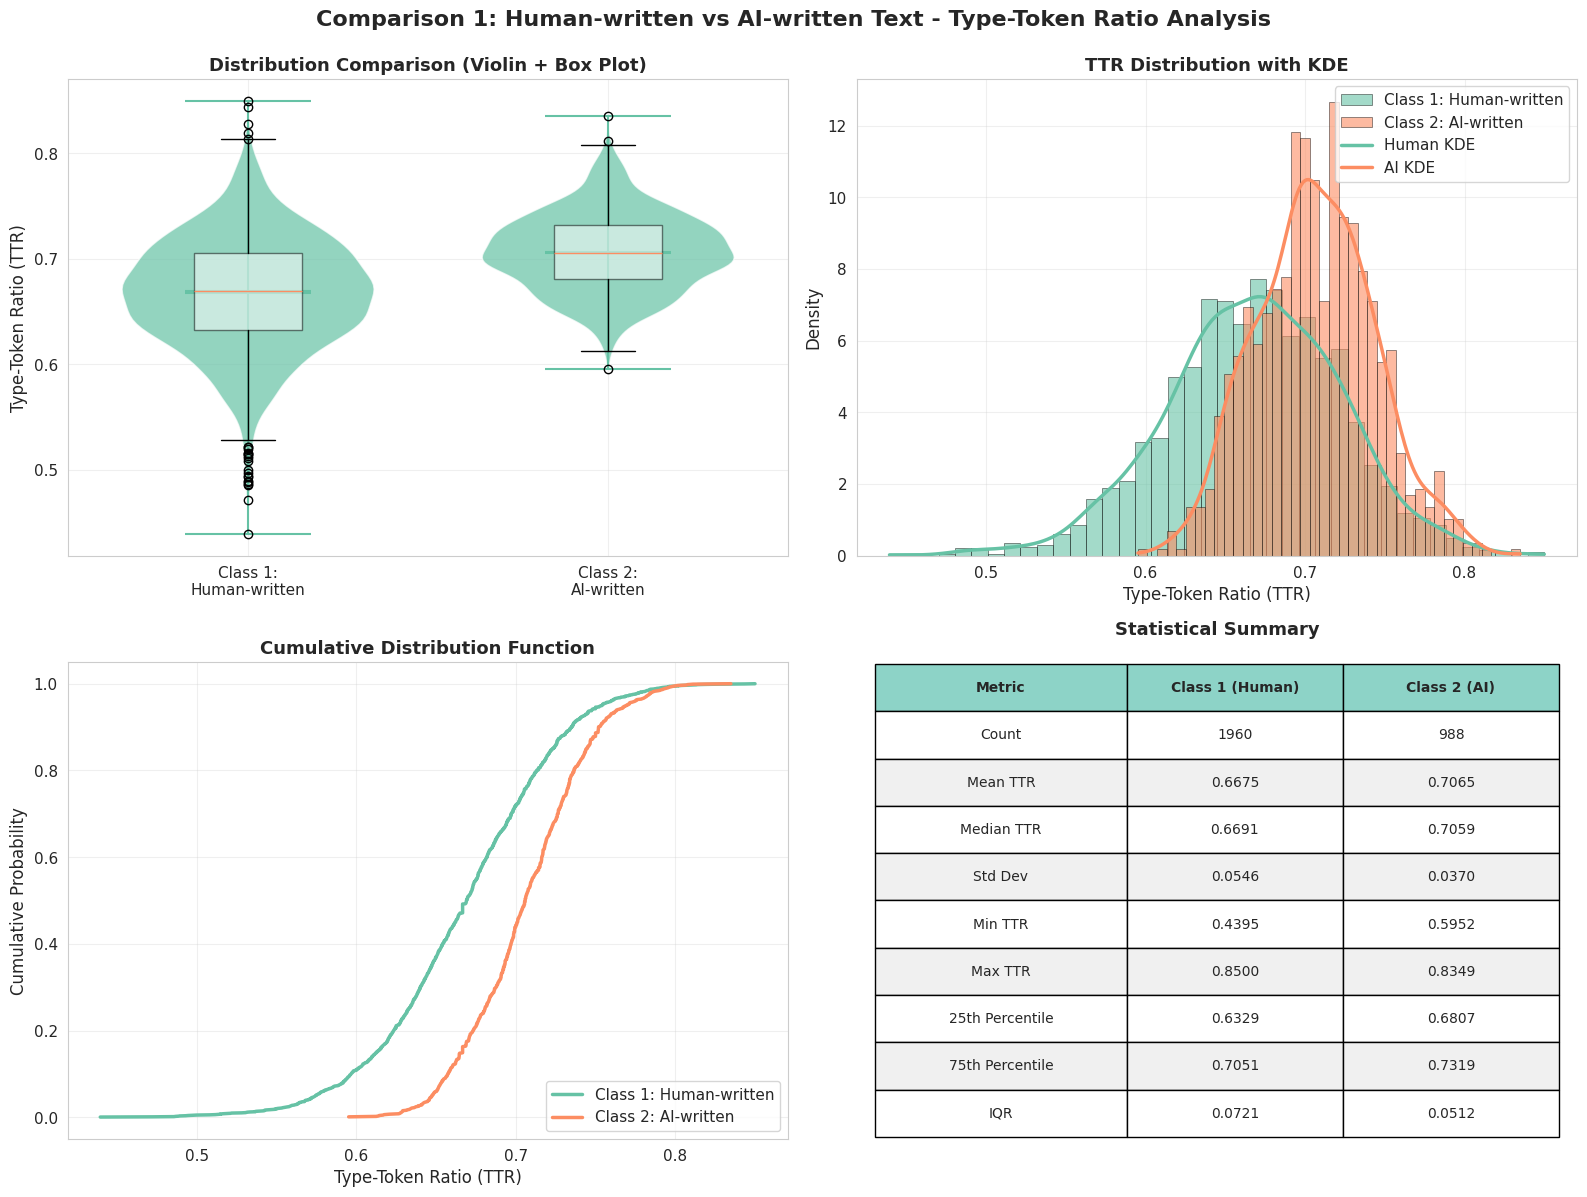

In [3]:
# Combine Class 1 and Class 2 data
df_comparison1 = pd.concat([df_class1, df_class2], ignore_index=True)

# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison 1: Human-written vs AI-written Text - Type-Token Ratio Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Violin plot with box plot overlay
ax1 = axes[0, 0]
parts = ax1.violinplot([df_class1['ttr'], df_class2['ttr']], 
                        positions=[0, 1], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
ax1.boxplot([df_class1['ttr'], df_class2['ttr']], 
            positions=[0, 1], 
            widths=0.3,
            patch_artist=True,
            boxprops=dict(facecolor='white', alpha=0.5))
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Class 1:\nHuman-written', 'Class 2:\nAI-written'])
ax1.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Histogram with KDE overlay
ax2 = axes[0, 1]
ax2.hist(df_class1['ttr'], bins=40, alpha=0.6, label='Class 1: Human-written', 
         color='#66c2a5', edgecolor='black', linewidth=0.5, density=True)
ax2.hist(df_class2['ttr'], bins=40, alpha=0.6, label='Class 2: AI-written', 
         color='#fc8d62', edgecolor='black', linewidth=0.5, density=True)

# Add KDE curves
from scipy import stats
if len(df_class1['ttr']) > 0:
    kde1 = stats.gaussian_kde(df_class1['ttr'])
    x_range = np.linspace(df_class1['ttr'].min(), df_class1['ttr'].max(), 200)
    ax2.plot(x_range, kde1(x_range), color='#66c2a5', linewidth=2.5, label='Human KDE')
if len(df_class2['ttr']) > 0:
    kde2 = stats.gaussian_kde(df_class2['ttr'])
    x_range = np.linspace(df_class2['ttr'].min(), df_class2['ttr'].max(), 200)
    ax2.plot(x_range, kde2(x_range), color='#fc8d62', linewidth=2.5, label='AI KDE')

ax2.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('TTR Distribution with KDE', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Cumulative Distribution Function (CDF)
ax3 = axes[1, 0]
sorted_ttr1 = np.sort(df_class1['ttr'])
sorted_ttr2 = np.sort(df_class2['ttr'])
cdf1 = np.arange(1, len(sorted_ttr1) + 1) / len(sorted_ttr1)
cdf2 = np.arange(1, len(sorted_ttr2) + 1) / len(sorted_ttr2)

ax3.plot(sorted_ttr1, cdf1, linewidth=2.5, label='Class 1: Human-written', color='#66c2a5')
ax3.plot(sorted_ttr2, cdf2, linewidth=2.5, label='Class 2: AI-written', color='#fc8d62')
ax3.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax3.set_ylabel('Cumulative Probability', fontsize=12)
ax3.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# 4. Statistical summary table
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate statistics
stats_data = {
    'Metric': ['Count', 'Mean TTR', 'Median TTR', 'Std Dev', 'Min TTR', 'Max TTR', 
               '25th Percentile', '75th Percentile', 'IQR'],
    'Class 1 (Human)': [
        len(df_class1),
        f"{df_class1['ttr'].mean():.4f}",
        f"{df_class1['ttr'].median():.4f}",
        f"{df_class1['ttr'].std():.4f}",
        f"{df_class1['ttr'].min():.4f}",
        f"{df_class1['ttr'].max():.4f}",
        f"{df_class1['ttr'].quantile(0.25):.4f}",
        f"{df_class1['ttr'].quantile(0.75):.4f}",
        f"{(df_class1['ttr'].quantile(0.75) - df_class1['ttr'].quantile(0.25)):.4f}"
    ],
    'Class 2 (AI)': [
        len(df_class2),
        f"{df_class2['ttr'].mean():.4f}",
        f"{df_class2['ttr'].median():.4f}",
        f"{df_class2['ttr'].std():.4f}",
        f"{df_class2['ttr'].min():.4f}",
        f"{df_class2['ttr'].max():.4f}",
        f"{df_class2['ttr'].quantile(0.25):.4f}",
        f"{df_class2['ttr'].quantile(0.75):.4f}",
        f"{(df_class2['ttr'].quantile(0.75) - df_class2['ttr'].quantile(0.25)):.4f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax4.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style the header
for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

# Alternate row colors
for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('Statistical Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Comparison 2: Class 1 (Human-written) vs Class 3 (AI-mimicry)

Now let's compare human-written text with AI attempting to mimic human authors.

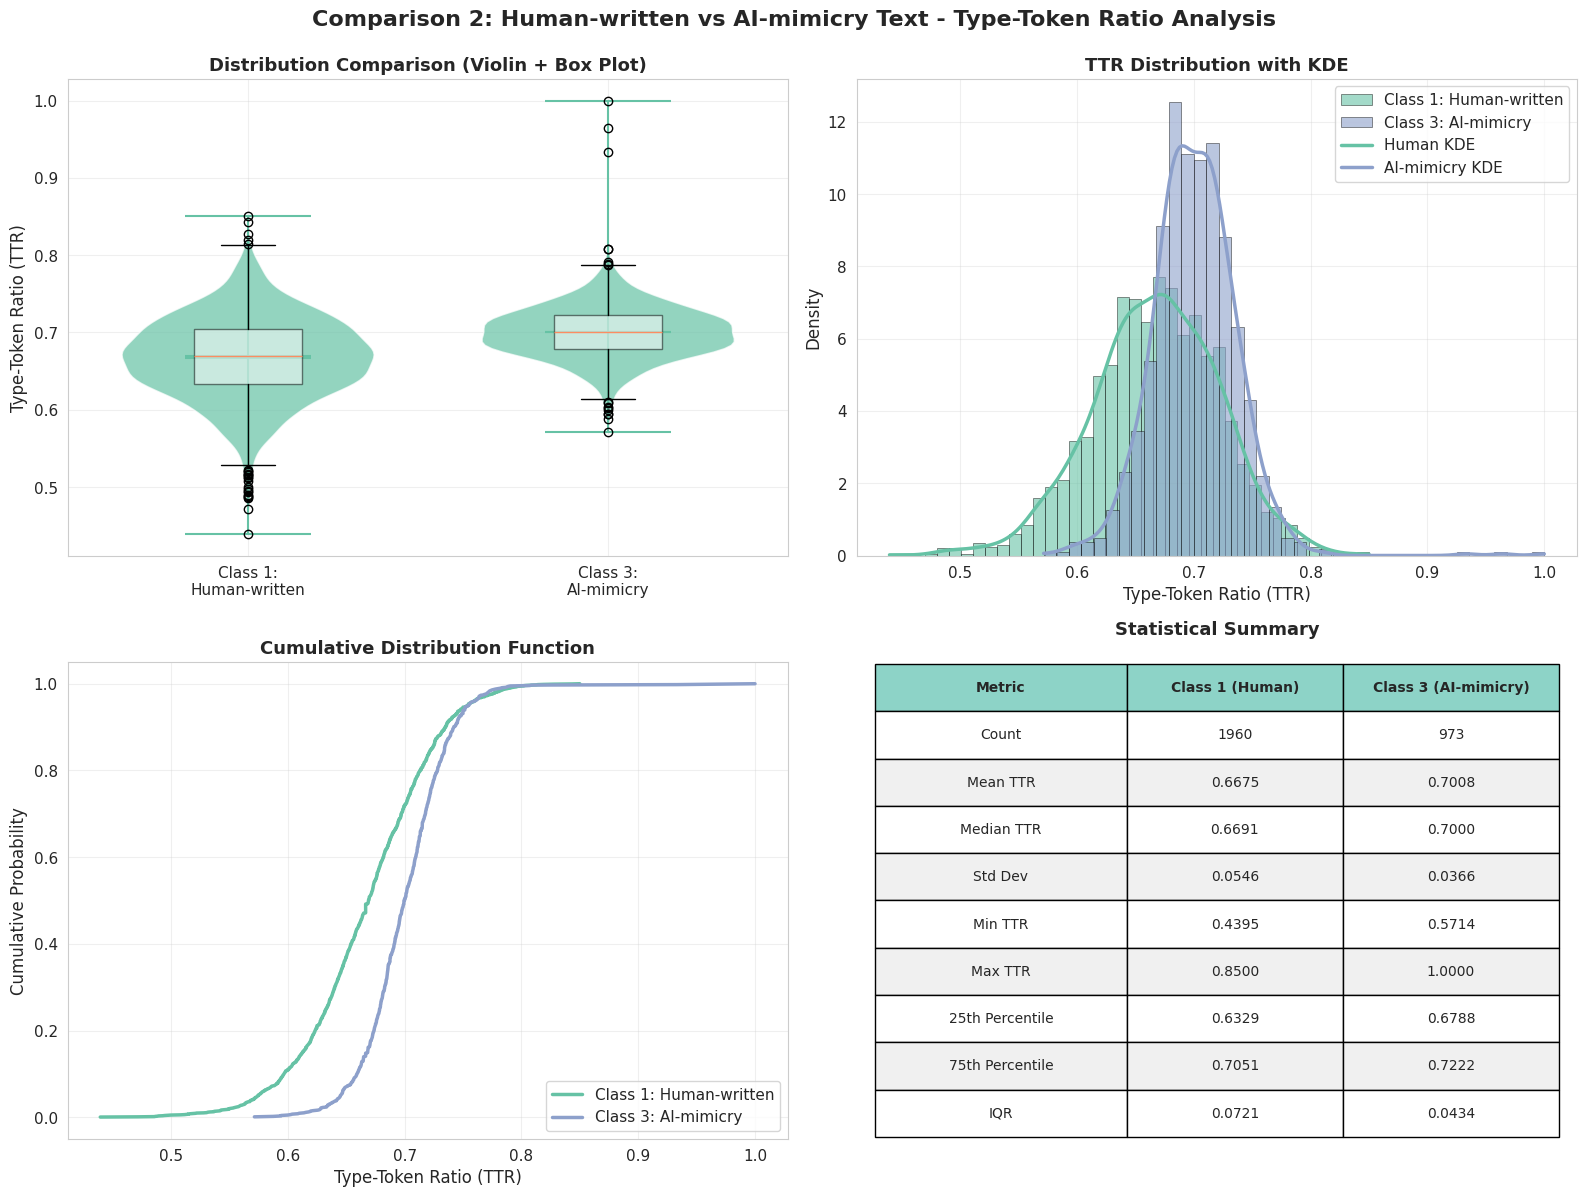

In [4]:
# Combine Class 1 and Class 3 data
df_comparison2 = pd.concat([df_class1, df_class3], ignore_index=True)

# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison 2: Human-written vs AI-mimicry Text - Type-Token Ratio Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Violin plot with box plot overlay
ax1 = axes[0, 0]
parts = ax1.violinplot([df_class1['ttr'], df_class3['ttr']], 
                        positions=[0, 1], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
ax1.boxplot([df_class1['ttr'], df_class3['ttr']], 
            positions=[0, 1], 
            widths=0.3,
            patch_artist=True,
            boxprops=dict(facecolor='white', alpha=0.5))
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Class 1:\nHuman-written', 'Class 3:\nAI-mimicry'])
ax1.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Histogram with KDE overlay
ax2 = axes[0, 1]
ax2.hist(df_class1['ttr'], bins=40, alpha=0.6, label='Class 1: Human-written', 
         color='#66c2a5', edgecolor='black', linewidth=0.5, density=True)
ax2.hist(df_class3['ttr'], bins=40, alpha=0.6, label='Class 3: AI-mimicry', 
         color='#8da0cb', edgecolor='black', linewidth=0.5, density=True)

# Add KDE curves
from scipy import stats
if len(df_class1['ttr']) > 0:
    kde1 = stats.gaussian_kde(df_class1['ttr'])
    x_range = np.linspace(df_class1['ttr'].min(), df_class1['ttr'].max(), 200)
    ax2.plot(x_range, kde1(x_range), color='#66c2a5', linewidth=2.5, label='Human KDE')
if len(df_class3['ttr']) > 0:
    kde3 = stats.gaussian_kde(df_class3['ttr'])
    x_range = np.linspace(df_class3['ttr'].min(), df_class3['ttr'].max(), 200)
    ax2.plot(x_range, kde3(x_range), color='#8da0cb', linewidth=2.5, label='AI-mimicry KDE')

ax2.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('TTR Distribution with KDE', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Cumulative Distribution Function (CDF)
ax3 = axes[1, 0]
sorted_ttr1 = np.sort(df_class1['ttr'])
sorted_ttr3 = np.sort(df_class3['ttr'])
cdf1 = np.arange(1, len(sorted_ttr1) + 1) / len(sorted_ttr1)
cdf3 = np.arange(1, len(sorted_ttr3) + 1) / len(sorted_ttr3)

ax3.plot(sorted_ttr1, cdf1, linewidth=2.5, label='Class 1: Human-written', color='#66c2a5')
ax3.plot(sorted_ttr3, cdf3, linewidth=2.5, label='Class 3: AI-mimicry', color='#8da0cb')
ax3.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax3.set_ylabel('Cumulative Probability', fontsize=12)
ax3.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# 4. Statistical summary table
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate statistics
stats_data = {
    'Metric': ['Count', 'Mean TTR', 'Median TTR', 'Std Dev', 'Min TTR', 'Max TTR', 
               '25th Percentile', '75th Percentile', 'IQR'],
    'Class 1 (Human)': [
        len(df_class1),
        f"{df_class1['ttr'].mean():.4f}",
        f"{df_class1['ttr'].median():.4f}",
        f"{df_class1['ttr'].std():.4f}",
        f"{df_class1['ttr'].min():.4f}",
        f"{df_class1['ttr'].max():.4f}",
        f"{df_class1['ttr'].quantile(0.25):.4f}",
        f"{df_class1['ttr'].quantile(0.75):.4f}",
        f"{(df_class1['ttr'].quantile(0.75) - df_class1['ttr'].quantile(0.25)):.4f}"
    ],
    'Class 3 (AI-mimicry)': [
        len(df_class3),
        f"{df_class3['ttr'].mean():.4f}",
        f"{df_class3['ttr'].median():.4f}",
        f"{df_class3['ttr'].std():.4f}",
        f"{df_class3['ttr'].min():.4f}",
        f"{df_class3['ttr'].max():.4f}",
        f"{df_class3['ttr'].quantile(0.25):.4f}",
        f"{df_class3['ttr'].quantile(0.75):.4f}",
        f"{(df_class3['ttr'].quantile(0.75) - df_class3['ttr'].quantile(0.25)):.4f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax4.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style the header
for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

# Alternate row colors
for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('Statistical Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Comparison 3: Class 2 (AI-written) vs Class 3 (AI-mimicry)

Here we compare two types of AI-generated text: generic AI-written vs AI attempting to mimic specific authors.

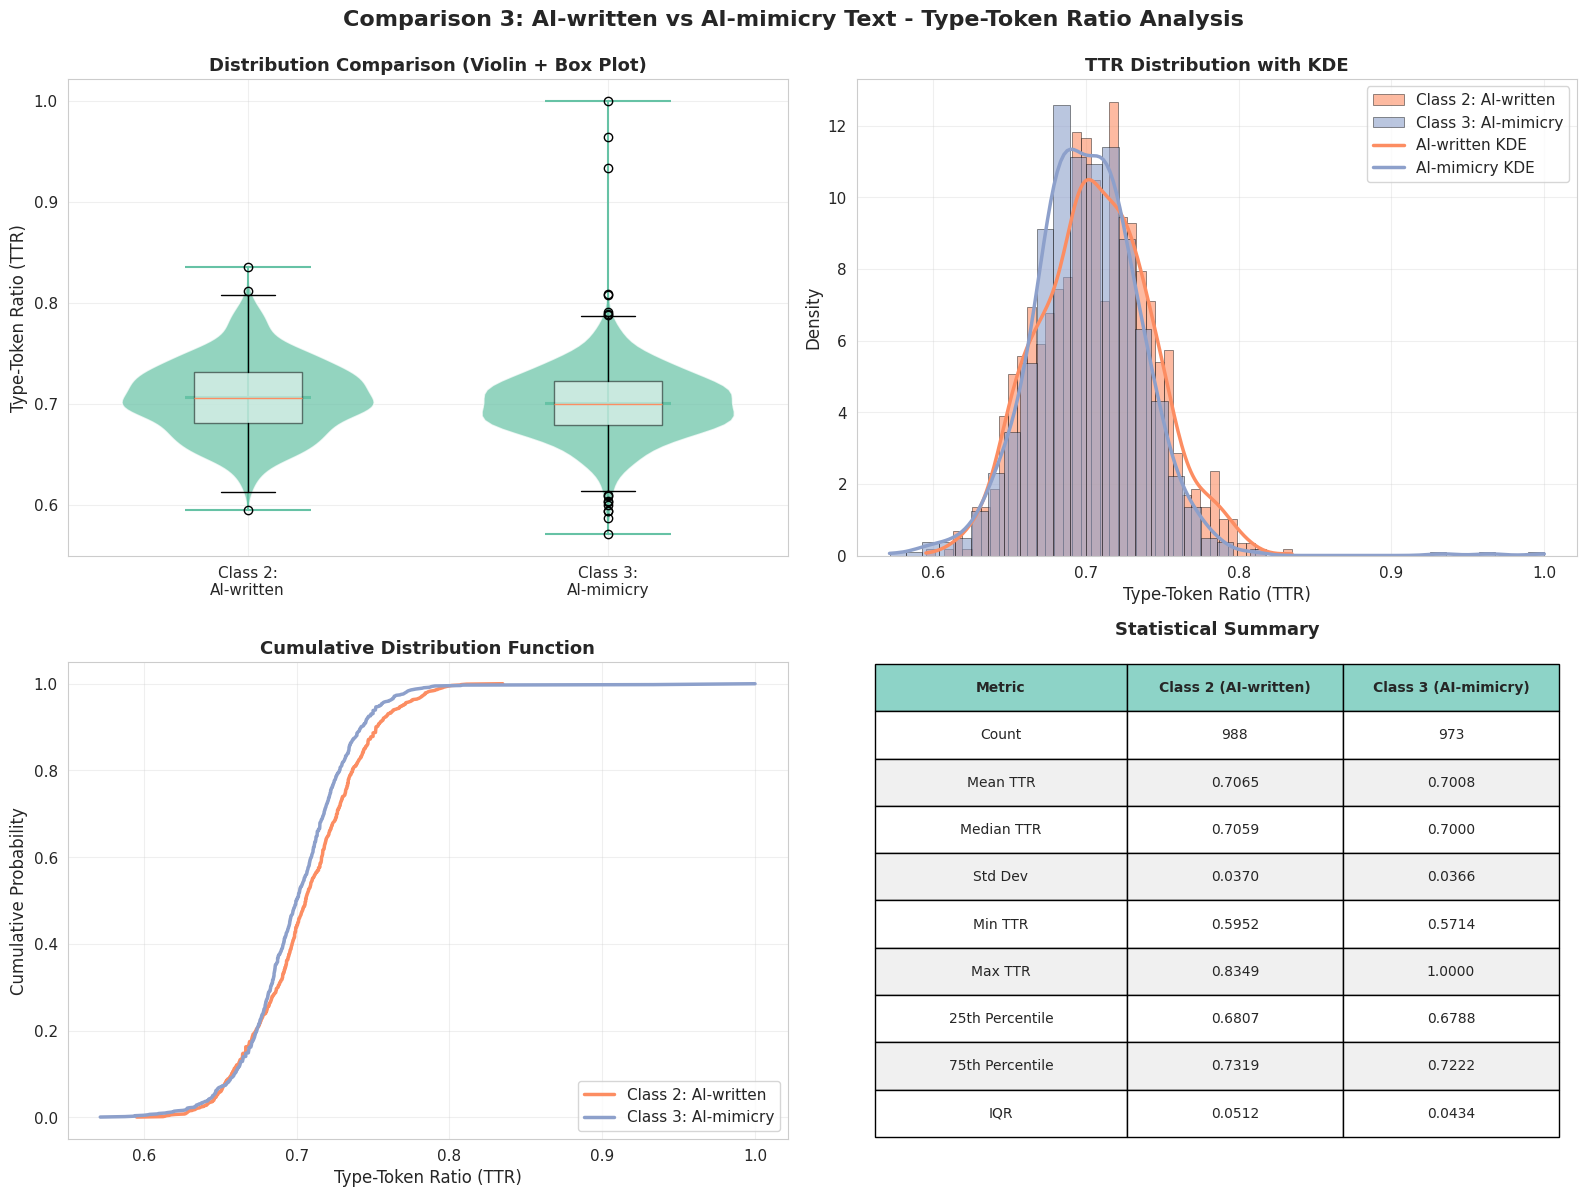

In [5]:
# Combine Class 2 and Class 3 data
df_comparison3 = pd.concat([df_class2, df_class3], ignore_index=True)

# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison 3: AI-written vs AI-mimicry Text - Type-Token Ratio Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Violin plot with box plot overlay
ax1 = axes[0, 0]
parts = ax1.violinplot([df_class2['ttr'], df_class3['ttr']], 
                        positions=[0, 1], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
ax1.boxplot([df_class2['ttr'], df_class3['ttr']], 
            positions=[0, 1], 
            widths=0.3,
            patch_artist=True,
            boxprops=dict(facecolor='white', alpha=0.5))
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Class 2:\nAI-written', 'Class 3:\nAI-mimicry'])
ax1.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Histogram with KDE overlay
ax2 = axes[0, 1]
ax2.hist(df_class2['ttr'], bins=40, alpha=0.6, label='Class 2: AI-written', 
         color='#fc8d62', edgecolor='black', linewidth=0.5, density=True)
ax2.hist(df_class3['ttr'], bins=40, alpha=0.6, label='Class 3: AI-mimicry', 
         color='#8da0cb', edgecolor='black', linewidth=0.5, density=True)

# Add KDE curves
from scipy import stats
if len(df_class2['ttr']) > 0:
    kde2 = stats.gaussian_kde(df_class2['ttr'])
    x_range = np.linspace(df_class2['ttr'].min(), df_class2['ttr'].max(), 200)
    ax2.plot(x_range, kde2(x_range), color='#fc8d62', linewidth=2.5, label='AI-written KDE')
if len(df_class3['ttr']) > 0:
    kde3 = stats.gaussian_kde(df_class3['ttr'])
    x_range = np.linspace(df_class3['ttr'].min(), df_class3['ttr'].max(), 200)
    ax2.plot(x_range, kde3(x_range), color='#8da0cb', linewidth=2.5, label='AI-mimicry KDE')

ax2.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('TTR Distribution with KDE', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Cumulative Distribution Function (CDF)
ax3 = axes[1, 0]
sorted_ttr2 = np.sort(df_class2['ttr'])
sorted_ttr3 = np.sort(df_class3['ttr'])
cdf2 = np.arange(1, len(sorted_ttr2) + 1) / len(sorted_ttr2)
cdf3 = np.arange(1, len(sorted_ttr3) + 1) / len(sorted_ttr3)

ax3.plot(sorted_ttr2, cdf2, linewidth=2.5, label='Class 2: AI-written', color='#fc8d62')
ax3.plot(sorted_ttr3, cdf3, linewidth=2.5, label='Class 3: AI-mimicry', color='#8da0cb')
ax3.set_xlabel('Type-Token Ratio (TTR)', fontsize=12)
ax3.set_ylabel('Cumulative Probability', fontsize=12)
ax3.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# 4. Statistical summary table
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate statistics
stats_data = {
    'Metric': ['Count', 'Mean TTR', 'Median TTR', 'Std Dev', 'Min TTR', 'Max TTR', 
               '25th Percentile', '75th Percentile', 'IQR'],
    'Class 2 (AI-written)': [
        len(df_class2),
        f"{df_class2['ttr'].mean():.4f}",
        f"{df_class2['ttr'].median():.4f}",
        f"{df_class2['ttr'].std():.4f}",
        f"{df_class2['ttr'].min():.4f}",
        f"{df_class2['ttr'].max():.4f}",
        f"{df_class2['ttr'].quantile(0.25):.4f}",
        f"{df_class2['ttr'].quantile(0.75):.4f}",
        f"{(df_class2['ttr'].quantile(0.75) - df_class2['ttr'].quantile(0.25)):.4f}"
    ],
    'Class 3 (AI-mimicry)': [
        len(df_class3),
        f"{df_class3['ttr'].mean():.4f}",
        f"{df_class3['ttr'].median():.4f}",
        f"{df_class3['ttr'].std():.4f}",
        f"{df_class3['ttr'].min():.4f}",
        f"{df_class3['ttr'].max():.4f}",
        f"{df_class3['ttr'].quantile(0.25):.4f}",
        f"{df_class3['ttr'].quantile(0.75):.4f}",
        f"{(df_class3['ttr'].quantile(0.75) - df_class3['ttr'].quantile(0.25)):.4f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax4.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style the header
for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

# Alternate row colors
for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('Statistical Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Comparison 4: All Three Classes Together

Finally, let's visualize all three classes together to get a comprehensive view of TTR across all text types.

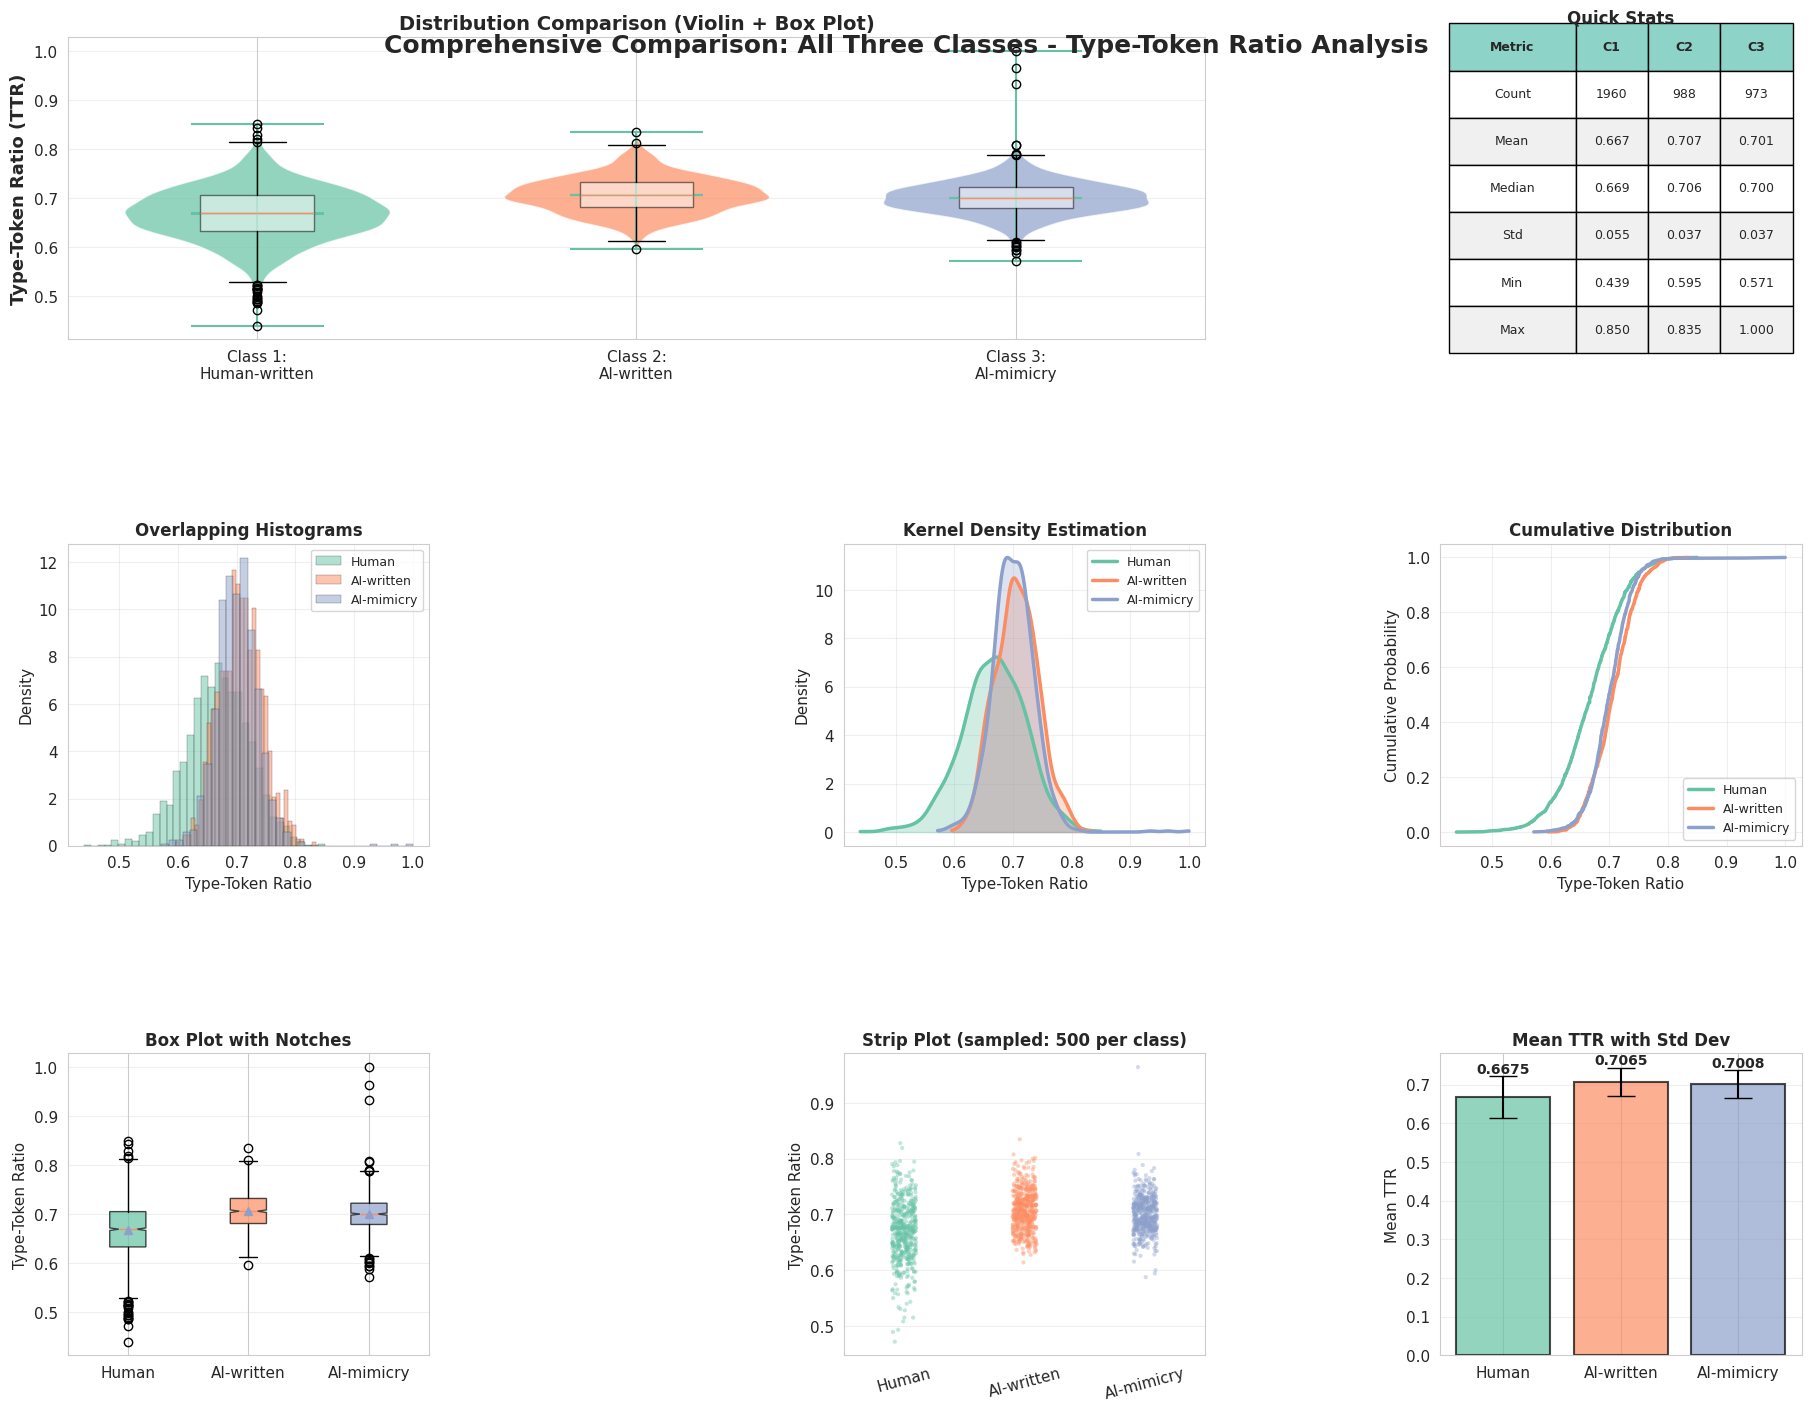

Kruskal-Wallis H-test (All Three Classes)
H-statistic: 514.45
P-value: 1.95e-112
Result: At least one class is SIGNIFICANTLY different (p < 0.05)


In [6]:
# Combine all classes
df_all = pd.concat([df_class1, df_class2, df_class3], ignore_index=True)

# Create a comprehensive visualization with all three classes
fig = plt.figure(figsize=(18, 14), constrained_layout=True)
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('Comprehensive Comparison: All Three Classes - Type-Token Ratio Analysis', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Large violin plot with all three classes (top left, spanning 2 columns)
ax1 = fig.add_subplot(gs[0, :2])
parts = ax1.violinplot([df_class1['ttr'], df_class2['ttr'], df_class3['ttr']], 
                        positions=[0, 1, 2], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)

# Color the violin plots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

# Overlay box plots
bp = ax1.boxplot([df_class1['ttr'], df_class2['ttr'], df_class3['ttr']], 
                  positions=[0, 1, 2], 
                  widths=0.3,
                  patch_artist=True)

for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor('white')
    patch.set_alpha(0.5)

ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Class 1:\nHuman-written', 'Class 2:\nAI-written', 'Class 3:\nAI-mimicry'])
ax1.set_ylabel('Type-Token Ratio (TTR)', fontsize=13, fontweight='bold')
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# 2. Statistical summary table (top right)
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')

stats_data = {
    'Metric': ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max'],
    'C1': [
        len(df_class1),
        f"{df_class1['ttr'].mean():.3f}",
        f"{df_class1['ttr'].median():.3f}",
        f"{df_class1['ttr'].std():.3f}",
        f"{df_class1['ttr'].min():.3f}",
        f"{df_class1['ttr'].max():.3f}"
    ],
    'C2': [
        len(df_class2),
        f"{df_class2['ttr'].mean():.3f}",
        f"{df_class2['ttr'].median():.3f}",
        f"{df_class2['ttr'].std():.3f}",
        f"{df_class2['ttr'].min():.3f}",
        f"{df_class2['ttr'].max():.3f}"
    ],
    'C3': [
        len(df_class3),
        f"{df_class3['ttr'].mean():.3f}",
        f"{df_class3['ttr'].median():.3f}",
        f"{df_class3['ttr'].std():.3f}",
        f"{df_class3['ttr'].min():.3f}",
        f"{df_class3['ttr'].max():.3f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax2.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.8)

for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax2.set_title('Quick Stats', fontsize=12, fontweight='bold', pad=10)

# 3. Overlapping histograms with KDE (middle left)
ax3 = fig.add_subplot(gs[1, 0])
ax3.hist(df_class1['ttr'], bins=35, alpha=0.5, label='Human', 
         color='#66c2a5', edgecolor='black', linewidth=0.3, density=True)
ax3.hist(df_class2['ttr'], bins=35, alpha=0.5, label='AI-written', 
         color='#fc8d62', edgecolor='black', linewidth=0.3, density=True)
ax3.hist(df_class3['ttr'], bins=35, alpha=0.5, label='AI-mimicry', 
         color='#8da0cb', edgecolor='black', linewidth=0.3, density=True)
ax3.set_xlabel('Type-Token Ratio', fontsize=11)
ax3.set_ylabel('Density', fontsize=11)
ax3.set_title('Overlapping Histograms', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. KDE comparison (middle center)
ax4 = fig.add_subplot(gs[1, 1])
from scipy import stats
if len(df_class1['ttr']) > 0:
    kde1 = stats.gaussian_kde(df_class1['ttr'])
    x_range = np.linspace(df_class1['ttr'].min(), df_class1['ttr'].max(), 300)
    ax4.plot(x_range, kde1(x_range), color='#66c2a5', linewidth=2.5, label='Human')
    ax4.fill_between(x_range, kde1(x_range), alpha=0.3, color='#66c2a5')

if len(df_class2['ttr']) > 0:
    kde2 = stats.gaussian_kde(df_class2['ttr'])
    x_range = np.linspace(df_class2['ttr'].min(), df_class2['ttr'].max(), 300)
    ax4.plot(x_range, kde2(x_range), color='#fc8d62', linewidth=2.5, label='AI-written')
    ax4.fill_between(x_range, kde2(x_range), alpha=0.3, color='#fc8d62')

if len(df_class3['ttr']) > 0:
    kde3 = stats.gaussian_kde(df_class3['ttr'])
    x_range = np.linspace(df_class3['ttr'].min(), df_class3['ttr'].max(), 300)
    ax4.plot(x_range, kde3(x_range), color='#8da0cb', linewidth=2.5, label='AI-mimicry')
    ax4.fill_between(x_range, kde3(x_range), alpha=0.3, color='#8da0cb')

ax4.set_xlabel('Type-Token Ratio', fontsize=11)
ax4.set_ylabel('Density', fontsize=11)
ax4.set_title('Kernel Density Estimation', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# 5. Cumulative Distribution Function (middle right)
ax5 = fig.add_subplot(gs[1, 2])
sorted_ttr1 = np.sort(df_class1['ttr'])
sorted_ttr2 = np.sort(df_class2['ttr'])
sorted_ttr3 = np.sort(df_class3['ttr'])
cdf1 = np.arange(1, len(sorted_ttr1) + 1) / len(sorted_ttr1)
cdf2 = np.arange(1, len(sorted_ttr2) + 1) / len(sorted_ttr2)
cdf3 = np.arange(1, len(sorted_ttr3) + 1) / len(sorted_ttr3)

ax5.plot(sorted_ttr1, cdf1, linewidth=2.5, label='Human', color='#66c2a5')
ax5.plot(sorted_ttr2, cdf2, linewidth=2.5, label='AI-written', color='#fc8d62')
ax5.plot(sorted_ttr3, cdf3, linewidth=2.5, label='AI-mimicry', color='#8da0cb')
ax5.set_xlabel('Type-Token Ratio', fontsize=11)
ax5.set_ylabel('Cumulative Probability', fontsize=11)
ax5.set_title('Cumulative Distribution', fontsize=12, fontweight='bold')
ax5.legend(fontsize=9, loc='lower right')
ax5.grid(True, alpha=0.3)

# 6. Box plot comparison (bottom left)
ax6 = fig.add_subplot(gs[2, 0])
bp = ax6.boxplot([df_class1['ttr'], df_class2['ttr'], df_class3['ttr']], 
                  tick_labels=['Human', 'AI-written', 'AI-mimicry'],
                  patch_artist=True,
                  notch=True,
                  showmeans=True)

for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[i])
    patch.set_alpha(0.7)

ax6.set_ylabel('Type-Token Ratio', fontsize=11)
ax6.set_title('Box Plot with Notches', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')

# 7. Swarm plot (bottom center)
ax7 = fig.add_subplot(gs[2, 1])
# Sample data for better visualization if too many points
sample_size = min(500, len(df_class1), len(df_class2), len(df_class3))
df_sample = pd.concat([
    df_class1.sample(n=min(sample_size, len(df_class1)), random_state=42),
    df_class2.sample(n=min(sample_size, len(df_class2)), random_state=42),
    df_class3.sample(n=min(sample_size, len(df_class3)), random_state=42)
])

sns.stripplot(data=df_sample, x='class', y='ttr', hue='class', ax=ax7, 
              palette=['#66c2a5', '#fc8d62', '#8da0cb'],
              alpha=0.4, size=3, legend=False)
ax7.set_xlabel('')
ax7.set_ylabel('Type-Token Ratio', fontsize=11)
ax7.set_title(f'Strip Plot (sampled: {sample_size} per class)', fontsize=12, fontweight='bold')
# Set ticks first, then labels
ax7.set_xticks(range(3))
ax7.set_xticklabels(['Human', 'AI-written', 'AI-mimicry'], rotation=15)
ax7.grid(True, alpha=0.3, axis='y')

# 8. Mean comparison bar plot with error bars (bottom right)
ax8 = fig.add_subplot(gs[2, 2])
means = [df_class1['ttr'].mean(), df_class2['ttr'].mean(), df_class3['ttr'].mean()]
stds = [df_class1['ttr'].std(), df_class2['ttr'].std(), df_class3['ttr'].std()]
x_pos = [0, 1, 2]

bars = ax8.bar(x_pos, means, yerr=stds, capsize=10, 
               color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, mean, std) in enumerate(zip(bars, means, stds)):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + std,
             f'{mean:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

ax8.set_xticks(x_pos)
ax8.set_xticklabels(['Human', 'AI-written', 'AI-mimicry'])
ax8.set_ylabel('Mean TTR', fontsize=11)
ax8.set_title('Mean TTR with Std Dev', fontsize=12, fontweight='bold')
ax8.grid(True, alpha=0.3, axis='y')

plt.show()

# Statistical testing: Kruskal-Wallis H-test (non-parametric ANOVA)
from scipy.stats import kruskal
h_statistic, p_value = kruskal(df_class1['ttr'], df_class2['ttr'], df_class3['ttr'])

print(f"Kruskal-Wallis H-test (All Three Classes)")
print(f"H-statistic: {h_statistic:.2f}")
print(f"P-value: {p_value:.2e}")
if p_value < 0.05:
    print(f"Result: At least one class is SIGNIFICANTLY different (p < 0.05)")
else:
    print(f"Result: NO significant differences among classes (p >= 0.05)")


### The results for TTR

This was quite surprising. As per the initial literature I had read, I was almost sure that the AI generate text would have a lower TTR than the human generated text. But it is not the case. It is clustered higher. 

I had to search up quite a bit on why this could be. Having already once fully reconfigured my dataset, I am yet to fully rule that out as the issue, but I find it a *bit* unlikely...

TTR naturally decreases with longer texts because words get repeated more often in longer documents. 

**So I checked if word count is correlated with TTR and if this bias affects our results.** You can see that here below.

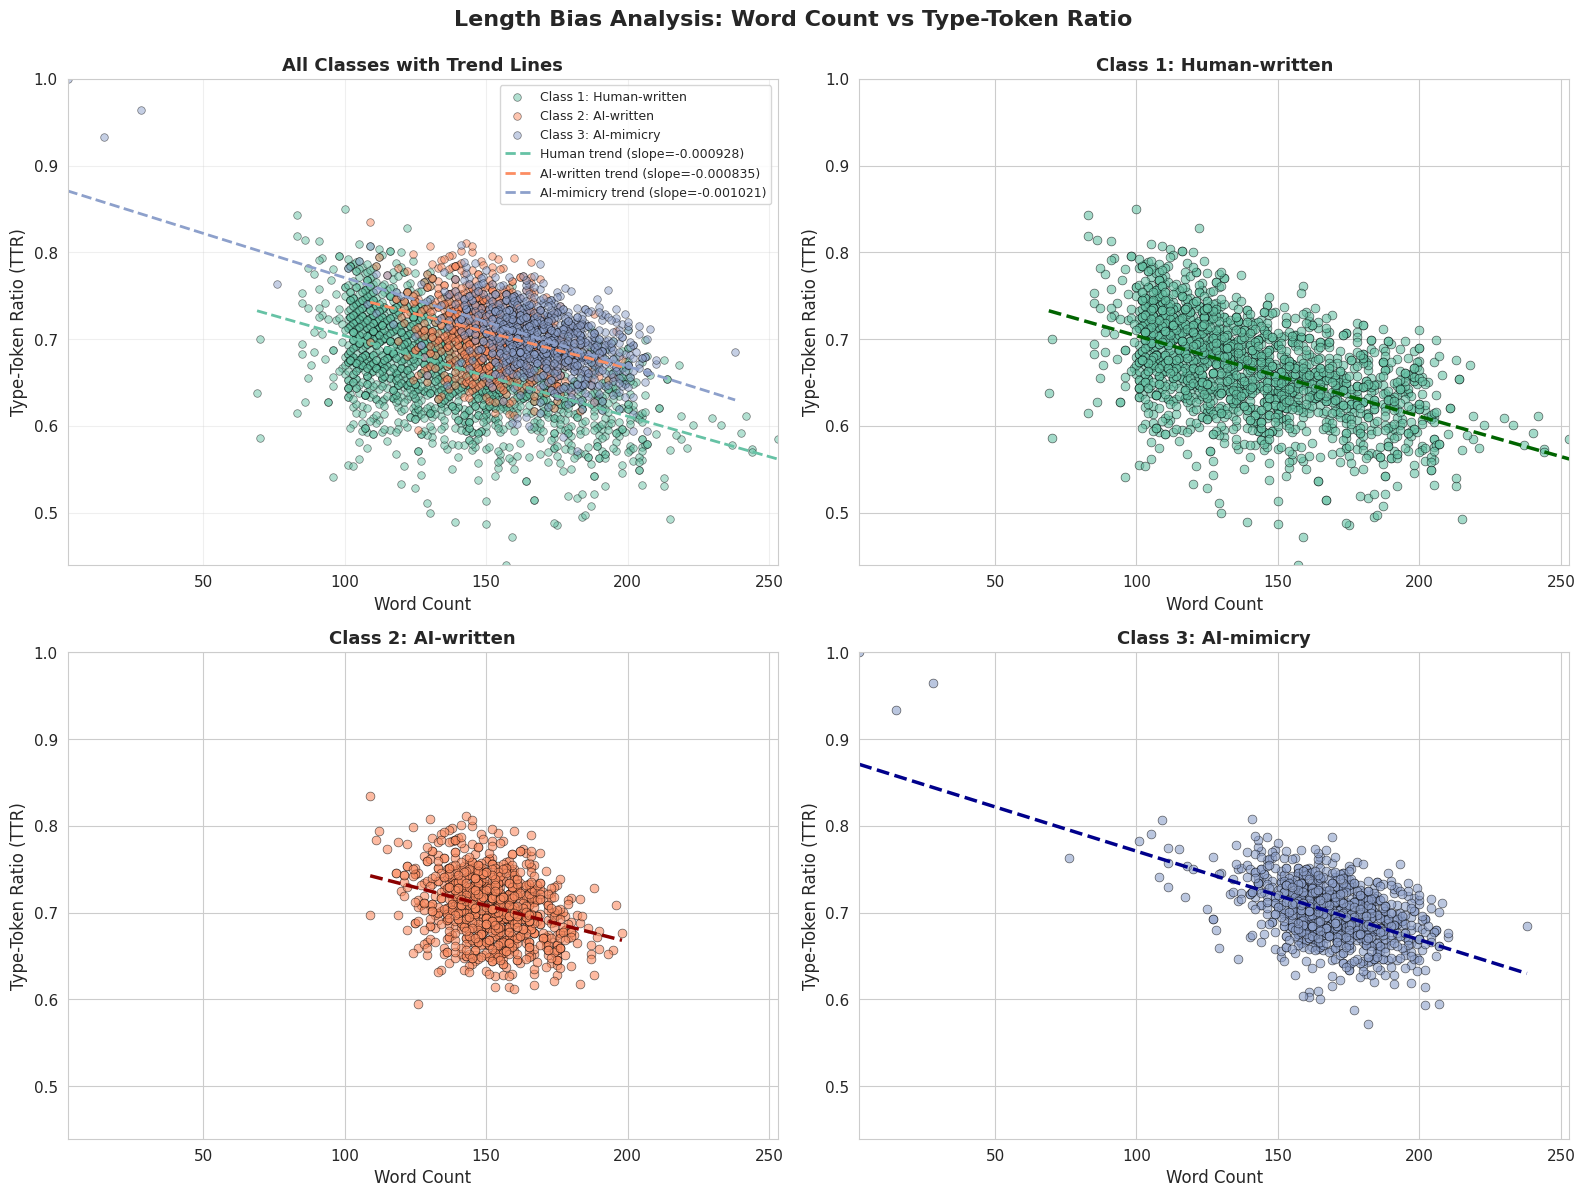

LINEAR REGRESSION ANALYSIS: Word Count vs TTR

Class 1 (Human-written):
  Slope: -0.000928 (TTR change per word)

Class 2 (AI-written):
  Slope: -0.000835 (TTR change per word)

Class 3 (AI-mimicry):
  Slope: -0.001021 (TTR change per word)
WORD COUNT STATISTICS

Class 1 (Human-written):
  Mean word count: 139.3
  Median word count: 133.0
  Std dev: 30.4
  Range: 69 - 253

Class 2 (AI-written):
  Mean word count: 152.1
  Median word count: 152.0
  Std dev: 13.9
  Range: 109 - 198

Class 3 (AI-mimicry):
  Mean word count: 168.6
  Median word count: 169.0
  Std dev: 19.3
  Range: 2 - 238
  Range: 2 - 238
  Range: 2 - 238
  Range: 2 - 238


In [7]:
# Scatter plot: Word Count vs TTR to check for length bias
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Length Bias Analysis: Word Count vs Type-Token Ratio', 
             fontsize=16, fontweight='bold', y=0.995)

# Determine common axis limits for all plots
all_word_counts = pd.concat([df_class1['word_count'], df_class2['word_count'], df_class3['word_count']])
all_ttrs = pd.concat([df_class1['ttr'], df_class2['ttr'], df_class3['ttr']])
word_count_range = [all_word_counts.min(), all_word_counts.max()]
ttr_range = [all_ttrs.min(), all_ttrs.max()]

# 1. All three classes overlaid
ax1 = axes[0, 0]
ax1.scatter(df_class1['word_count'], df_class1['ttr'], alpha=0.5, s=30, 
           color='#66c2a5', label='Class 1: Human-written', edgecolors='black', linewidths=0.5)
ax1.scatter(df_class2['word_count'], df_class2['ttr'], alpha=0.5, s=30, 
           color='#fc8d62', label='Class 2: AI-written', edgecolors='black', linewidths=0.5)
ax1.scatter(df_class3['word_count'], df_class3['ttr'], alpha=0.5, s=30, 
           color='#8da0cb', label='Class 3: AI-mimicry', edgecolors='black', linewidths=0.5)

# Add trend lines
from scipy.stats import linregress
if len(df_class1) > 0:
    slope1, intercept1, r1, p1, se1 = linregress(df_class1['word_count'], df_class1['ttr'])
    x_fit1 = np.linspace(df_class1['word_count'].min(), df_class1['word_count'].max(), 100)
    ax1.plot(x_fit1, slope1 * x_fit1 + intercept1, color='#66c2a5', linewidth=2, 
             linestyle='--', label=f'Human trend (slope={slope1:.6f})')

if len(df_class2) > 0:
    slope2, intercept2, r2, p2, se2 = linregress(df_class2['word_count'], df_class2['ttr'])
    x_fit2 = np.linspace(df_class2['word_count'].min(), df_class2['word_count'].max(), 100)
    ax1.plot(x_fit2, slope2 * x_fit2 + intercept2, color='#fc8d62', linewidth=2, 
             linestyle='--', label=f'AI-written trend (slope={slope2:.6f})')

if len(df_class3) > 0:
    slope3, intercept3, r3, p3, se3 = linregress(df_class3['word_count'], df_class3['ttr'])
    x_fit3 = np.linspace(df_class3['word_count'].min(), df_class3['word_count'].max(), 100)
    ax1.plot(x_fit3, slope3 * x_fit3 + intercept3, color='#8da0cb', linewidth=2, 
             linestyle='--', label=f'AI-mimicry trend (slope={slope3:.6f})')

ax1.set_xlabel('Word Count', fontsize=12)
ax1.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax1.set_title('All Classes with Trend Lines', fontsize=13, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(word_count_range)
ax1.set_ylim(ttr_range)

# 2. Class 1 only (Human-written)
ax2 = axes[0, 1]
ax2.scatter(df_class1['word_count'], df_class1['ttr'], alpha=0.6, s=40, 
           color='#66c2a5', edgecolors='black', linewidths=0.5)
if len(df_class1) > 0:
    ax2.plot(x_fit1, slope1 * x_fit1 + intercept1, color='darkgreen', linewidth=2.5, 
             linestyle='--', label=f'Trend line (slope={slope1:.6f})')
ax2.set_xlabel('Word Count', fontsize=12)
ax2.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax2.set_title('Class 1: Human-written', fontsize=13, fontweight='bold')
ax2.set_xlim(word_count_range)
ax2.set_ylim(ttr_range)

# 3. Class 2 only (AI-written)
ax3 = axes[1, 0]
ax3.scatter(df_class2['word_count'], df_class2['ttr'], alpha=0.6, s=40, 
           color='#fc8d62', edgecolors='black', linewidths=0.5)
if len(df_class2) > 0:
    ax3.plot(x_fit2, slope2 * x_fit2 + intercept2, color='darkred', linewidth=2.5, 
             linestyle='--', label=f'Trend line (slope={slope2:.6f})')
ax3.set_xlabel('Word Count', fontsize=12)
ax3.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax3.set_title('Class 2: AI-written', fontsize=13, fontweight='bold')
ax3.set_xlim(word_count_range)
ax3.set_ylim(ttr_range)

# 4. Class 3 only (AI-mimicry)
ax4 = axes[1, 1]
ax4.scatter(df_class3['word_count'], df_class3['ttr'], alpha=0.6, s=40, 
           color='#8da0cb', edgecolors='black', linewidths=0.5)
if len(df_class3) > 0:
    ax4.plot(x_fit3, slope3 * x_fit3 + intercept3, color='darkblue', linewidth=2.5, 
             linestyle='--', label=f'Trend line (slope={slope3:.6f})')
ax4.set_xlabel('Word Count', fontsize=12)
ax4.set_ylabel('Type-Token Ratio (TTR)', fontsize=12)
ax4.set_title('Class 3: AI-mimicry', fontsize=13, fontweight='bold')
ax4.set_xlim(word_count_range)
ax4.set_ylim(ttr_range)

plt.tight_layout()
plt.show()

# Print slope statistics
print(f"LINEAR REGRESSION ANALYSIS: Word Count vs TTR")
print(f"\nClass 1 (Human-written):")
print(f"  Slope: {slope1:.6f} (TTR change per word)")

print(f"\nClass 2 (AI-written):")
print(f"  Slope: {slope2:.6f} (TTR change per word)")

print(f"\nClass 3 (AI-mimicry):")
print(f"  Slope: {slope3:.6f} (TTR change per word)")

print(f"WORD COUNT STATISTICS")
print(f"\nClass 1 (Human-written):")
print(f"  Mean word count: {df_class1['word_count'].mean():.1f}")
print(f"  Median word count: {df_class1['word_count'].median():.1f}")
print(f"  Std dev: {df_class1['word_count'].std():.1f}")
print(f"  Range: {df_class1['word_count'].min():.0f} - {df_class1['word_count'].max():.0f}")

print(f"\nClass 2 (AI-written):")
print(f"  Mean word count: {df_class2['word_count'].mean():.1f}")
print(f"  Median word count: {df_class2['word_count'].median():.1f}")
print(f"  Std dev: {df_class2['word_count'].std():.1f}")
print(f"  Range: {df_class2['word_count'].min():.0f} - {df_class2['word_count'].max():.0f}")

print(f"\nClass 3 (AI-mimicry):")
print(f"  Mean word count: {df_class3['word_count'].mean():.1f}")
print(f"  Median word count: {df_class3['word_count'].median():.1f}")
print(f"  Std dev: {df_class3['word_count'].std():.1f}")

print(f"  Range: {df_class3['word_count'].min():.0f} - {df_class3['word_count'].max():.0f}")
print(f"  Range: {df_class3['word_count'].min():.0f} - {df_class3['word_count'].max():.0f}")
print(f"  Range: {df_class3['word_count'].min():.0f} - {df_class3['word_count'].max():.0f}")
print(f"  Range: {df_class3['word_count'].min():.0f} - {df_class3['word_count'].max():.0f}")




**Ok, cool**

This shows us something quite interesting.  
1. The AI generated text is very clustered around 150 to slightly more than 150 for the mimiced one, while the human written text while also in the 100-200 range is more spread, but I don't see how that is very statistically significant. More importantly 2.
2. The data shows that while humans are more lexically varied, AI is more lexically dense.  

Here's what I mean by that statement.  
Look at the violin and box plot (figure 1 and 2). It's quite clear that the main difference between the 2 datasets is not the mean, but rather the **variance along the y-axis.**  

Both class 2 and 3 are heavily clustered between 0.6 and 0.8, while the human-written text seems to vary more. This matches the assumption that human written text is a dynamic function subject to interpretation of the author.

**However, my assumption that AI generated text will have a lower TTR than human generated text still did not hold true.**

In most cases, the TTR of AI is higher, but it seems to mostly be in the same range. While I am not sure why the TTR of Gemini pro was so high, the range can be attributed as above. I reckon that later syntactical tests might explain this.

---

## 2. Hapax Legomena

Another measure of lexical richness is the Hapax Legomena, i.e. words that appear exactly once within a given sample. In a typical 5,000-word human text, hapax legomena often constitute 40-50% of the unique vocabulary.

Research indicates that AI-generated texts display a markedly lower ratio of hapax legomena to total vocabulary. In comparative studies of essays, the relative frequency of rare words (specifically those not ranking in the top 1,000 most common words) allowed for confident classification of AI versus human authorship.  
The mechanism behind this "Hapax Deficit" is rooted in the "temperature" parameter of generation.

- **Low temperature (< 0.8):** This implies determinism, almost exclusively selecting the most probable next token. This eliminates hapax legomena almost entirely, resulting in a TTR that plummets.
- **High temperature (> 1.2):** While raising the temperature forces the model to select lower-probability tokens, studies show that it still fails to replicate human patterns. High-temperature AI generation introduces rare words stochastically rather than contextually. Human rare words tend to appear in semantic "bursts" or specific topical clusters, whereas AI rare words appear as random spikes, often disrupting coherence.

For text generation, I have used a temperature in between this, 1.0. Let us see how that fares.

I learned about the Hapax Legomena from these 3 references. All claims I made above can be cross-verified from these as well.

1. [Culda et al, 2024](https://www.tandfonline.com/doi/full/10.1080/09540091.2025.2507183)
2. [Kudryavtseva et al, 2025](https://www.researchgate.net/publication/394353951_Comparative_Statistical_Analysis_of_Word_Frequencies_in_Human-Written_and_AI-Generated_Texts)
3. [Schephens et al, 2025](https://pmc.ncbi.nlm.nih.gov/articles/PMC12571048/)

#### My Hypothesis

I think that since the temperature is 1.0, the AI generated text in general will be moderately higher than the human-written text on average.

In [8]:
from collections import Counter

def calculate_hapax_ratio(text):
    """
    Calculate Hapax Legomena ratio for a given text.
    Hapax Legomena = words that appear exactly once in the text
    Hapax Ratio = (Number of words appearing once) / (Total unique words)
    """
    words = re.findall(r'\b[a-z]+\b', text.lower())
    
    if len(words) == 0:
        return 0.0
    
    word_freq = Counter(words)
    hapax_count = sum(1 for count in word_freq.values() if count == 1)
    unique_words = len(word_freq)
    
    if unique_words == 0:
        return 0.0
    
    return hapax_count / unique_words

def load_paragraphs_with_hapax(directory_path, class_name):    
    data = []
    
    # Get all .txt files in the directory
    txt_files = glob.glob(os.path.join(str(directory_path), '*.txt'))
        
    for file_path in txt_files:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read().strip()
            
            if text:  # Only process non-empty files
                ttr = calculate_ttr(text)
                hapax_ratio = calculate_hapax_ratio(text)
                word_count = len(re.findall(r'\b[a-z]+\b', text.lower()))
                
                data.append({
                    'class': class_name,
                    'file': os.path.basename(file_path),
                    'ttr': ttr,
                    'hapax_ratio': hapax_ratio,
                    'word_count': word_count
                })
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    
    return pd.DataFrame(data)

def load_class1_with_hapax():
    base_path = DATASET_DIR / 'class1-human-written'
    authors = [
        '01-arthur-conan-doyle',
        '02-pg-wodehouse',
        '03-mark-twain',
        '04-william-shakespeare'
    ]
    
    all_data = []
    for author in authors:
        path = base_path / author / 'extracted_paragraphs'
        df = load_paragraphs_with_hapax(path, 'Class 1: Human-written')
        all_data.append(df)
    
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

def load_class2_with_hapax():
    path = DATASET_DIR / 'class2-ai-written' / 'ai-generated-paragraphs'
    return load_paragraphs_with_hapax(path, 'Class 2: AI-written')

def load_class3_with_hapax():
    base_path = DATASET_DIR / 'class3-ai-mimicry'
    authors = [
        '01-arthur-conan-doyle',
        '02-pg-wodehouse',
        '03-mark-twain',
        '04-william-shakespeare'
    ]
    
    all_data = []
    for author in authors:
        path = base_path / author
        df = load_paragraphs_with_hapax(path, 'Class 3: AI-mimicry')
        all_data.append(df)
    
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

# Reload all data with hapax calculations

df_class1 = load_class1_with_hapax()
df_class2 = load_class2_with_hapax()
df_class3 = load_class3_with_hapax()

### Comparison 1: Class 1 (Human-written) vs Class 2 (AI-written)

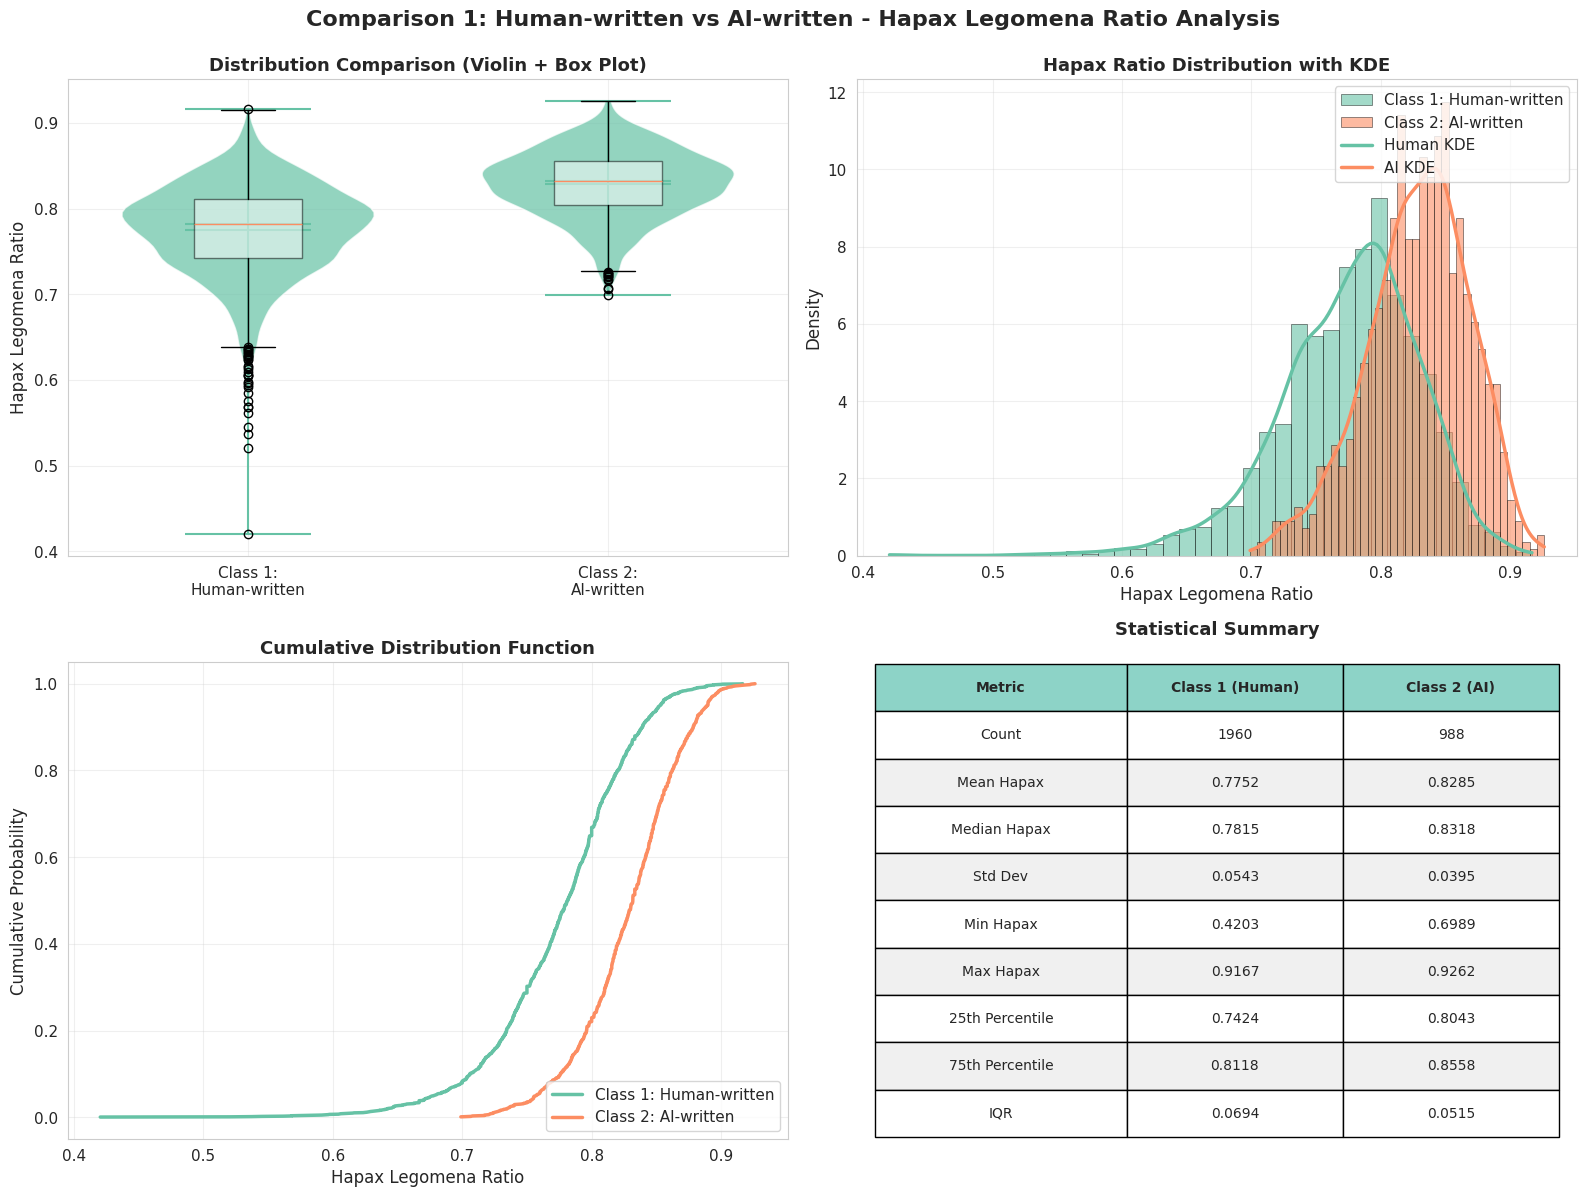

In [9]:
# Comparison 1: Class 1 vs Class 2
df_hapax_comp1 = pd.concat([df_class1, df_class2], ignore_index=True)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison 1: Human-written vs AI-written - Hapax Legomena Ratio Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Violin plot with box plot overlay
ax1 = axes[0, 0]
parts = ax1.violinplot([df_class1['hapax_ratio'], df_class2['hapax_ratio']], 
                        positions=[0, 1], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
ax1.boxplot([df_class1['hapax_ratio'], df_class2['hapax_ratio']], 
            positions=[0, 1], 
            widths=0.3,
            patch_artist=True,
            boxprops=dict(facecolor='white', alpha=0.5))
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Class 1:\nHuman-written', 'Class 2:\nAI-written'])
ax1.set_ylabel('Hapax Legomena Ratio', fontsize=12)
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Histogram with KDE overlay
ax2 = axes[0, 1]
ax2.hist(df_class1['hapax_ratio'], bins=40, alpha=0.6, label='Class 1: Human-written', 
         color='#66c2a5', edgecolor='black', linewidth=0.5, density=True)
ax2.hist(df_class2['hapax_ratio'], bins=40, alpha=0.6, label='Class 2: AI-written', 
         color='#fc8d62', edgecolor='black', linewidth=0.5, density=True)

# Add KDE curves
if len(df_class1['hapax_ratio']) > 0:
    kde1 = stats.gaussian_kde(df_class1['hapax_ratio'])
    x_range = np.linspace(df_class1['hapax_ratio'].min(), df_class1['hapax_ratio'].max(), 200)
    ax2.plot(x_range, kde1(x_range), color='#66c2a5', linewidth=2.5, label='Human KDE')
if len(df_class2['hapax_ratio']) > 0:
    kde2 = stats.gaussian_kde(df_class2['hapax_ratio'])
    x_range = np.linspace(df_class2['hapax_ratio'].min(), df_class2['hapax_ratio'].max(), 200)
    ax2.plot(x_range, kde2(x_range), color='#fc8d62', linewidth=2.5, label='AI KDE')

ax2.set_xlabel('Hapax Legomena Ratio', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('Hapax Ratio Distribution with KDE', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Cumulative Distribution Function (CDF)
ax3 = axes[1, 0]
sorted_hapax1 = np.sort(df_class1['hapax_ratio'])
sorted_hapax2 = np.sort(df_class2['hapax_ratio'])
cdf1 = np.arange(1, len(sorted_hapax1) + 1) / len(sorted_hapax1)
cdf2 = np.arange(1, len(sorted_hapax2) + 1) / len(sorted_hapax2)

ax3.plot(sorted_hapax1, cdf1, linewidth=2.5, label='Class 1: Human-written', color='#66c2a5')
ax3.plot(sorted_hapax2, cdf2, linewidth=2.5, label='Class 2: AI-written', color='#fc8d62')
ax3.set_xlabel('Hapax Legomena Ratio', fontsize=12)
ax3.set_ylabel('Cumulative Probability', fontsize=12)
ax3.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# 4. Statistical summary table
ax4 = axes[1, 1]
ax4.axis('off')

stats_data = {
    'Metric': ['Count', 'Mean Hapax', 'Median Hapax', 'Std Dev', 'Min Hapax', 'Max Hapax', 
               '25th Percentile', '75th Percentile', 'IQR'],
    'Class 1 (Human)': [
        len(df_class1),
        f"{df_class1['hapax_ratio'].mean():.4f}",
        f"{df_class1['hapax_ratio'].median():.4f}",
        f"{df_class1['hapax_ratio'].std():.4f}",
        f"{df_class1['hapax_ratio'].min():.4f}",
        f"{df_class1['hapax_ratio'].max():.4f}",
        f"{df_class1['hapax_ratio'].quantile(0.25):.4f}",
        f"{df_class1['hapax_ratio'].quantile(0.75):.4f}",
        f"{(df_class1['hapax_ratio'].quantile(0.75) - df_class1['hapax_ratio'].quantile(0.25)):.4f}"
    ],
    'Class 2 (AI)': [
        len(df_class2),
        f"{df_class2['hapax_ratio'].mean():.4f}",
        f"{df_class2['hapax_ratio'].median():.4f}",
        f"{df_class2['hapax_ratio'].std():.4f}",
        f"{df_class2['hapax_ratio'].min():.4f}",
        f"{df_class2['hapax_ratio'].max():.4f}",
        f"{df_class2['hapax_ratio'].quantile(0.25):.4f}",
        f"{df_class2['hapax_ratio'].quantile(0.75):.4f}",
        f"{(df_class2['hapax_ratio'].quantile(0.75) - df_class2['hapax_ratio'].quantile(0.25)):.4f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax4.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style the header
for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

# Alternate row colors
for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('Statistical Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Comparison 2: Class 1 (Human-written) vs Class 3 (AI-mimicry)


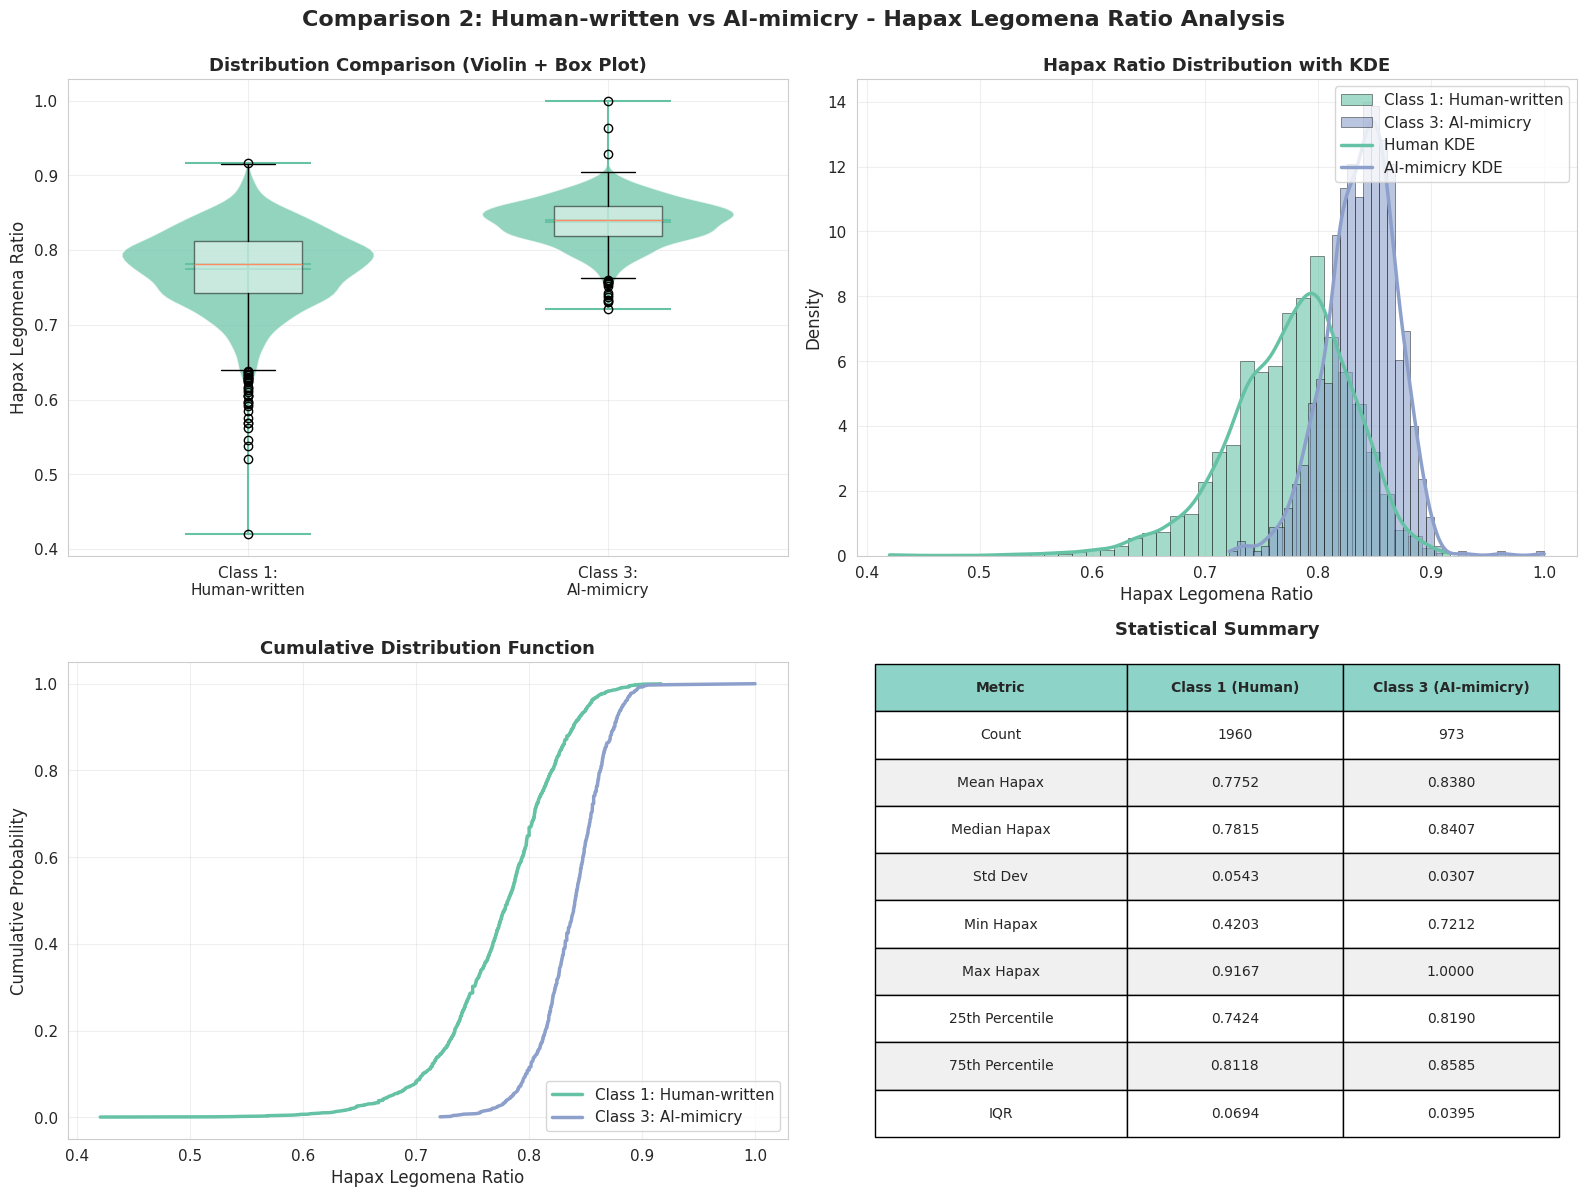

In [10]:
# Comparison 2: Class 1 vs Class 3
df_hapax_comp2 = pd.concat([df_class1, df_class3], ignore_index=True)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison 2: Human-written vs AI-mimicry - Hapax Legomena Ratio Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Violin plot with box plot overlay
ax1 = axes[0, 0]
parts = ax1.violinplot([df_class1['hapax_ratio'], df_class3['hapax_ratio']], 
                        positions=[0, 1], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
ax1.boxplot([df_class1['hapax_ratio'], df_class3['hapax_ratio']], 
            positions=[0, 1], 
            widths=0.3,
            patch_artist=True,
            boxprops=dict(facecolor='white', alpha=0.5))
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Class 1:\nHuman-written', 'Class 3:\nAI-mimicry'])
ax1.set_ylabel('Hapax Legomena Ratio', fontsize=12)
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Histogram with KDE overlay
ax2 = axes[0, 1]
ax2.hist(df_class1['hapax_ratio'], bins=40, alpha=0.6, label='Class 1: Human-written', 
         color='#66c2a5', edgecolor='black', linewidth=0.5, density=True)
ax2.hist(df_class3['hapax_ratio'], bins=40, alpha=0.6, label='Class 3: AI-mimicry', 
         color='#8da0cb', edgecolor='black', linewidth=0.5, density=True)

# Add KDE curves
if len(df_class1['hapax_ratio']) > 0:
    kde1 = stats.gaussian_kde(df_class1['hapax_ratio'])
    x_range = np.linspace(df_class1['hapax_ratio'].min(), df_class1['hapax_ratio'].max(), 200)
    ax2.plot(x_range, kde1(x_range), color='#66c2a5', linewidth=2.5, label='Human KDE')
if len(df_class3['hapax_ratio']) > 0:
    kde3 = stats.gaussian_kde(df_class3['hapax_ratio'])
    x_range = np.linspace(df_class3['hapax_ratio'].min(), df_class3['hapax_ratio'].max(), 200)
    ax2.plot(x_range, kde3(x_range), color='#8da0cb', linewidth=2.5, label='AI-mimicry KDE')

ax2.set_xlabel('Hapax Legomena Ratio', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('Hapax Ratio Distribution with KDE', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Cumulative Distribution Function (CDF)
ax3 = axes[1, 0]
sorted_hapax1 = np.sort(df_class1['hapax_ratio'])
sorted_hapax3 = np.sort(df_class3['hapax_ratio'])
cdf1 = np.arange(1, len(sorted_hapax1) + 1) / len(sorted_hapax1)
cdf3 = np.arange(1, len(sorted_hapax3) + 1) / len(sorted_hapax3)

ax3.plot(sorted_hapax1, cdf1, linewidth=2.5, label='Class 1: Human-written', color='#66c2a5')
ax3.plot(sorted_hapax3, cdf3, linewidth=2.5, label='Class 3: AI-mimicry', color='#8da0cb')
ax3.set_xlabel('Hapax Legomena Ratio', fontsize=12)
ax3.set_ylabel('Cumulative Probability', fontsize=12)
ax3.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# 4. Statistical summary table
ax4 = axes[1, 1]
ax4.axis('off')

stats_data = {
    'Metric': ['Count', 'Mean Hapax', 'Median Hapax', 'Std Dev', 'Min Hapax', 'Max Hapax', 
               '25th Percentile', '75th Percentile', 'IQR'],
    'Class 1 (Human)': [
        len(df_class1),
        f"{df_class1['hapax_ratio'].mean():.4f}",
        f"{df_class1['hapax_ratio'].median():.4f}",
        f"{df_class1['hapax_ratio'].std():.4f}",
        f"{df_class1['hapax_ratio'].min():.4f}",
        f"{df_class1['hapax_ratio'].max():.4f}",
        f"{df_class1['hapax_ratio'].quantile(0.25):.4f}",
        f"{df_class1['hapax_ratio'].quantile(0.75):.4f}",
        f"{(df_class1['hapax_ratio'].quantile(0.75) - df_class1['hapax_ratio'].quantile(0.25)):.4f}"
    ],
    'Class 3 (AI-mimicry)': [
        len(df_class3),
        f"{df_class3['hapax_ratio'].mean():.4f}",
        f"{df_class3['hapax_ratio'].median():.4f}",
        f"{df_class3['hapax_ratio'].std():.4f}",
        f"{df_class3['hapax_ratio'].min():.4f}",
        f"{df_class3['hapax_ratio'].max():.4f}",
        f"{df_class3['hapax_ratio'].quantile(0.25):.4f}",
        f"{df_class3['hapax_ratio'].quantile(0.75):.4f}",
        f"{(df_class3['hapax_ratio'].quantile(0.75) - df_class3['hapax_ratio'].quantile(0.25)):.4f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax4.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style the header
for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

# Alternate row colors
for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('Statistical Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Comparison 3: Class 2 (AI-written) vs Class 3 (AI-mimicry)

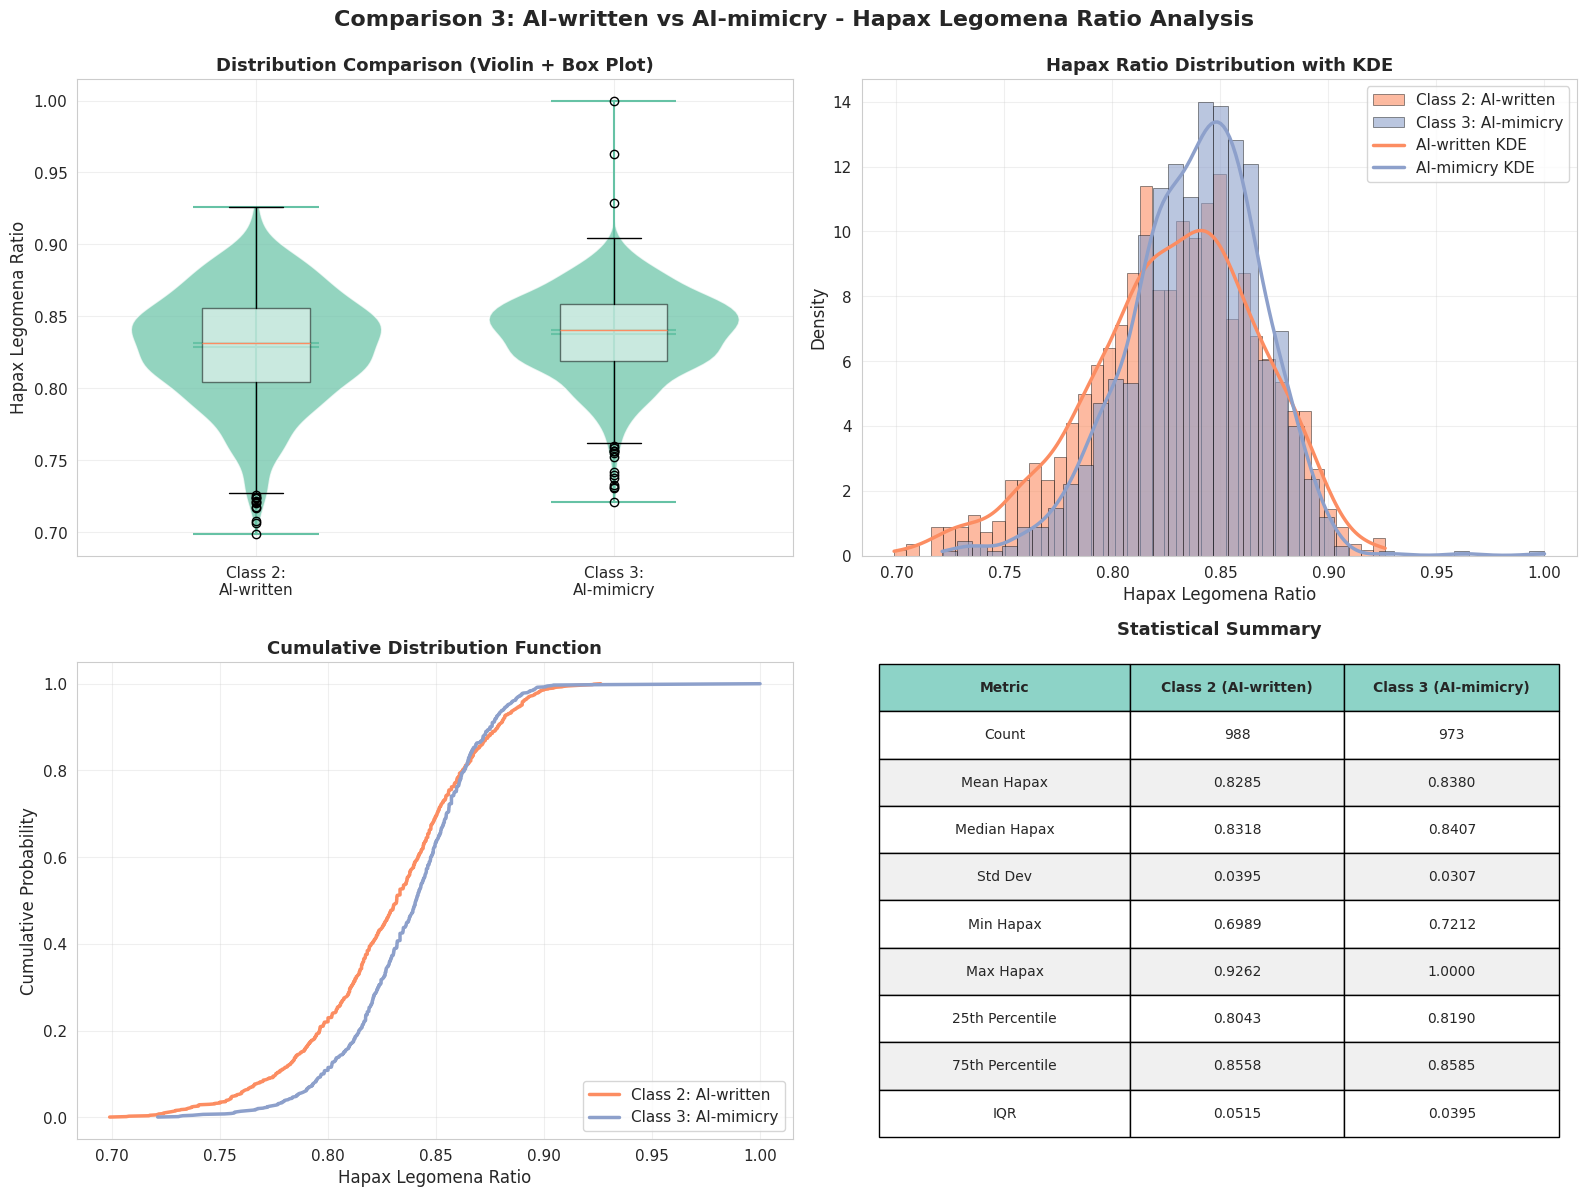

In [11]:
# Comparison 3: Class 2 vs Class 3
df_hapax_comp3 = pd.concat([df_class2, df_class3], ignore_index=True)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison 3: AI-written vs AI-mimicry - Hapax Legomena Ratio Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# 1. Violin plot with box plot overlay
ax1 = axes[0, 0]
parts = ax1.violinplot([df_class2['hapax_ratio'], df_class3['hapax_ratio']], 
                        positions=[0, 1], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
ax1.boxplot([df_class2['hapax_ratio'], df_class3['hapax_ratio']], 
            positions=[0, 1], 
            widths=0.3,
            patch_artist=True,
            boxprops=dict(facecolor='white', alpha=0.5))
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Class 2:\nAI-written', 'Class 3:\nAI-mimicry'])
ax1.set_ylabel('Hapax Legomena Ratio', fontsize=12)
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Histogram with KDE overlay
ax2 = axes[0, 1]
ax2.hist(df_class2['hapax_ratio'], bins=40, alpha=0.6, label='Class 2: AI-written', 
         color='#fc8d62', edgecolor='black', linewidth=0.5, density=True)
ax2.hist(df_class3['hapax_ratio'], bins=40, alpha=0.6, label='Class 3: AI-mimicry', 
         color='#8da0cb', edgecolor='black', linewidth=0.5, density=True)

# Add KDE curves
if len(df_class2['hapax_ratio']) > 0:
    kde2 = stats.gaussian_kde(df_class2['hapax_ratio'])
    x_range = np.linspace(df_class2['hapax_ratio'].min(), df_class2['hapax_ratio'].max(), 200)
    ax2.plot(x_range, kde2(x_range), color='#fc8d62', linewidth=2.5, label='AI-written KDE')
if len(df_class3['hapax_ratio']) > 0:
    kde3 = stats.gaussian_kde(df_class3['hapax_ratio'])
    x_range = np.linspace(df_class3['hapax_ratio'].min(), df_class3['hapax_ratio'].max(), 200)
    ax2.plot(x_range, kde3(x_range), color='#8da0cb', linewidth=2.5, label='AI-mimicry KDE')

ax2.set_xlabel('Hapax Legomena Ratio', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('Hapax Ratio Distribution with KDE', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Cumulative Distribution Function (CDF)
ax3 = axes[1, 0]
sorted_hapax2 = np.sort(df_class2['hapax_ratio'])
sorted_hapax3 = np.sort(df_class3['hapax_ratio'])
cdf2 = np.arange(1, len(sorted_hapax2) + 1) / len(sorted_hapax2)
cdf3 = np.arange(1, len(sorted_hapax3) + 1) / len(sorted_hapax3)

ax3.plot(sorted_hapax2, cdf2, linewidth=2.5, label='Class 2: AI-written', color='#fc8d62')
ax3.plot(sorted_hapax3, cdf3, linewidth=2.5, label='Class 3: AI-mimicry', color='#8da0cb')
ax3.set_xlabel('Hapax Legomena Ratio', fontsize=12)
ax3.set_ylabel('Cumulative Probability', fontsize=12)
ax3.set_title('Cumulative Distribution Function', fontsize=13, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# 4. Statistical summary table
ax4 = axes[1, 1]
ax4.axis('off')

stats_data = {
    'Metric': ['Count', 'Mean Hapax', 'Median Hapax', 'Std Dev', 'Min Hapax', 'Max Hapax', 
               '25th Percentile', '75th Percentile', 'IQR'],
    'Class 2 (AI-written)': [
        len(df_class2),
        f"{df_class2['hapax_ratio'].mean():.4f}",
        f"{df_class2['hapax_ratio'].median():.4f}",
        f"{df_class2['hapax_ratio'].std():.4f}",
        f"{df_class2['hapax_ratio'].min():.4f}",
        f"{df_class2['hapax_ratio'].max():.4f}",
        f"{df_class2['hapax_ratio'].quantile(0.25):.4f}",
        f"{df_class2['hapax_ratio'].quantile(0.75):.4f}",
        f"{(df_class2['hapax_ratio'].quantile(0.75) - df_class2['hapax_ratio'].quantile(0.25)):.4f}"
    ],
    'Class 3 (AI-mimicry)': [
        len(df_class3),
        f"{df_class3['hapax_ratio'].mean():.4f}",
        f"{df_class3['hapax_ratio'].median():.4f}",
        f"{df_class3['hapax_ratio'].std():.4f}",
        f"{df_class3['hapax_ratio'].min():.4f}",
        f"{df_class3['hapax_ratio'].max():.4f}",
        f"{df_class3['hapax_ratio'].quantile(0.25):.4f}",
        f"{df_class3['hapax_ratio'].quantile(0.75):.4f}",
        f"{(df_class3['hapax_ratio'].quantile(0.75) - df_class3['hapax_ratio'].quantile(0.25)):.4f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax4.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style the header
for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

# Alternate row colors
for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('Statistical Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### Comparison 4: All Three Classes Together

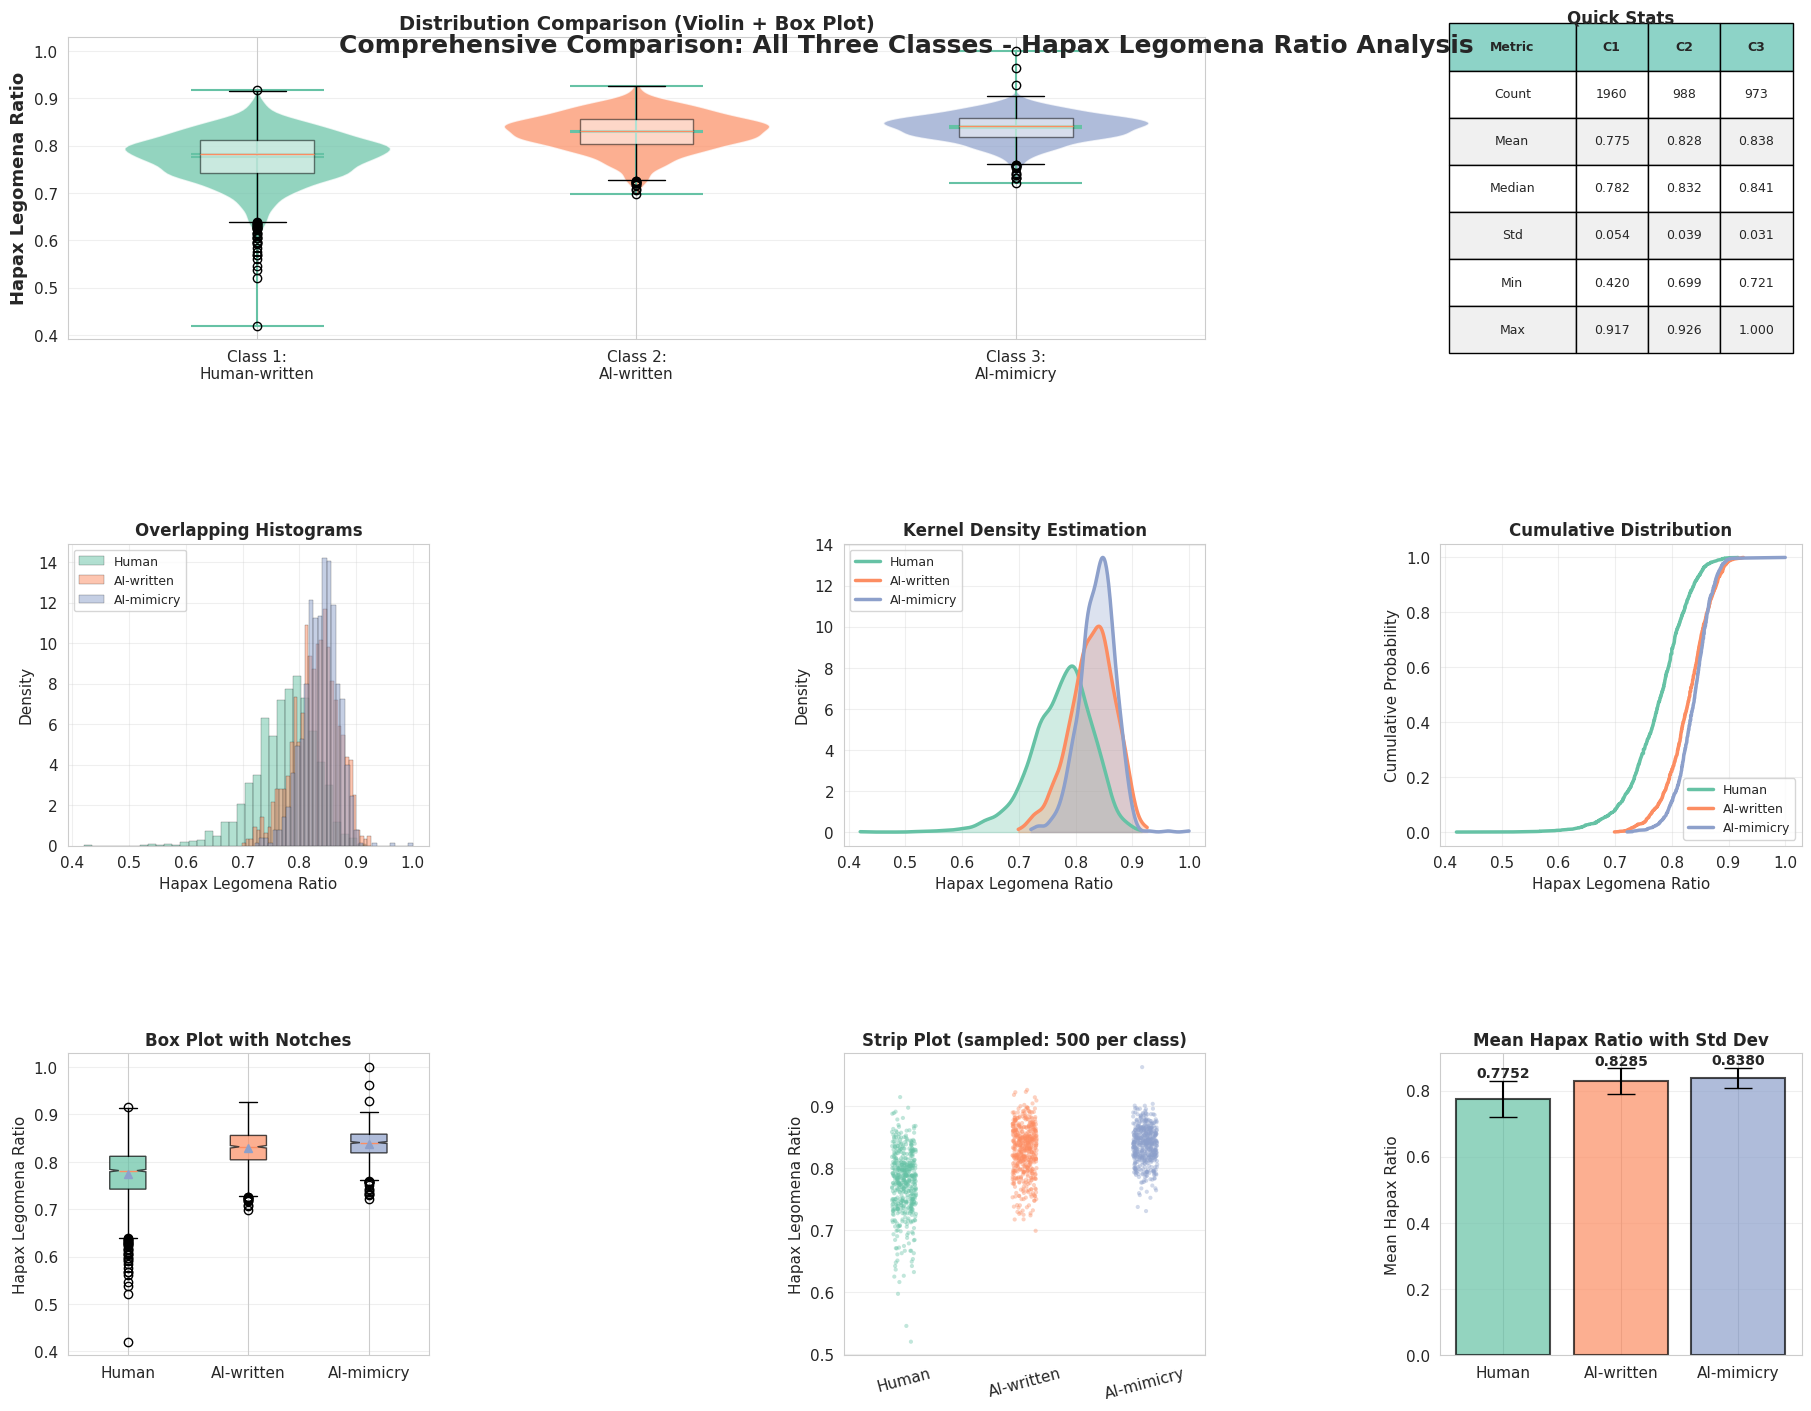

Kruskal-Wallis H-test (All Three Classes - Hapax Legomena)
H-statistic: 1248.32
P-value: 8.52e-272
Result: At least one class is SIGNIFICANTLY different (p < 0.05)


In [13]:
# Combine all classes
df_hapax_all = pd.concat([df_class1, df_class2, df_class3], ignore_index=True)

# Create comprehensive visualization with all three classes
fig = plt.figure(figsize=(18, 14), constrained_layout=True)
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('Comprehensive Comparison: All Three Classes - Hapax Legomena Ratio Analysis', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Large violin plot with all three classes
ax1 = fig.add_subplot(gs[0, :2])
parts = ax1.violinplot([df_class1['hapax_ratio'], df_class2['hapax_ratio'], df_class3['hapax_ratio']], 
                        positions=[0, 1, 2], 
                        showmeans=True, 
                        showmedians=True,
                        widths=0.7)

colors = ['#66c2a5', '#fc8d62', '#8da0cb']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

bp = ax1.boxplot([df_class1['hapax_ratio'], df_class2['hapax_ratio'], df_class3['hapax_ratio']], 
                  positions=[0, 1, 2], 
                  widths=0.3,
                  patch_artist=True)

for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor('white')
    patch.set_alpha(0.5)

ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Class 1:\nHuman-written', 'Class 2:\nAI-written', 'Class 3:\nAI-mimicry'])
ax1.set_ylabel('Hapax Legomena Ratio', fontsize=13, fontweight='bold')
ax1.set_title('Distribution Comparison (Violin + Box Plot)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# 2. Statistical summary table
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')

stats_data = {
    'Metric': ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max'],
    'C1': [
        len(df_class1),
        f"{df_class1['hapax_ratio'].mean():.3f}",
        f"{df_class1['hapax_ratio'].median():.3f}",
        f"{df_class1['hapax_ratio'].std():.3f}",
        f"{df_class1['hapax_ratio'].min():.3f}",
        f"{df_class1['hapax_ratio'].max():.3f}"
    ],
    'C2': [
        len(df_class2),
        f"{df_class2['hapax_ratio'].mean():.3f}",
        f"{df_class2['hapax_ratio'].median():.3f}",
        f"{df_class2['hapax_ratio'].std():.3f}",
        f"{df_class2['hapax_ratio'].min():.3f}",
        f"{df_class2['hapax_ratio'].max():.3f}"
    ],
    'C3': [
        len(df_class3),
        f"{df_class3['hapax_ratio'].mean():.3f}",
        f"{df_class3['hapax_ratio'].median():.3f}",
        f"{df_class3['hapax_ratio'].std():.3f}",
        f"{df_class3['hapax_ratio'].min():.3f}",
        f"{df_class3['hapax_ratio'].max():.3f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
table = ax2.table(cellText=stats_df.values, colLabels=stats_df.columns,
                  cellLoc='center', loc='center',
                  colWidths=[0.35, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.8)

for i in range(len(stats_df.columns)):
    table[(0, i)].set_facecolor('#8dd3c7')
    table[(0, i)].set_text_props(weight='bold')

for i in range(1, len(stats_df) + 1):
    for j in range(len(stats_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax2.set_title('Quick Stats', fontsize=12, fontweight='bold', pad=10)

# 3. Overlapping histograms
ax3 = fig.add_subplot(gs[1, 0])
ax3.hist(df_class1['hapax_ratio'], bins=35, alpha=0.5, label='Human', 
         color='#66c2a5', edgecolor='black', linewidth=0.3, density=True)
ax3.hist(df_class2['hapax_ratio'], bins=35, alpha=0.5, label='AI-written', 
         color='#fc8d62', edgecolor='black', linewidth=0.3, density=True)
ax3.hist(df_class3['hapax_ratio'], bins=35, alpha=0.5, label='AI-mimicry', 
         color='#8da0cb', edgecolor='black', linewidth=0.3, density=True)
ax3.set_xlabel('Hapax Legomena Ratio', fontsize=11)
ax3.set_ylabel('Density', fontsize=11)
ax3.set_title('Overlapping Histograms', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. KDE comparison
ax4 = fig.add_subplot(gs[1, 1])
if len(df_class1['hapax_ratio']) > 0:
    kde1 = stats.gaussian_kde(df_class1['hapax_ratio'])
    x_range = np.linspace(df_class1['hapax_ratio'].min(), df_class1['hapax_ratio'].max(), 300)
    ax4.plot(x_range, kde1(x_range), color='#66c2a5', linewidth=2.5, label='Human')
    ax4.fill_between(x_range, kde1(x_range), alpha=0.3, color='#66c2a5')

if len(df_class2['hapax_ratio']) > 0:
    kde2 = stats.gaussian_kde(df_class2['hapax_ratio'])
    x_range = np.linspace(df_class2['hapax_ratio'].min(), df_class2['hapax_ratio'].max(), 300)
    ax4.plot(x_range, kde2(x_range), color='#fc8d62', linewidth=2.5, label='AI-written')
    ax4.fill_between(x_range, kde2(x_range), alpha=0.3, color='#fc8d62')

if len(df_class3['hapax_ratio']) > 0:
    kde3 = stats.gaussian_kde(df_class3['hapax_ratio'])
    x_range = np.linspace(df_class3['hapax_ratio'].min(), df_class3['hapax_ratio'].max(), 300)
    ax4.plot(x_range, kde3(x_range), color='#8da0cb', linewidth=2.5, label='AI-mimicry')
    ax4.fill_between(x_range, kde3(x_range), alpha=0.3, color='#8da0cb')

ax4.set_xlabel('Hapax Legomena Ratio', fontsize=11)
ax4.set_ylabel('Density', fontsize=11)
ax4.set_title('Kernel Density Estimation', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# 5. Cumulative Distribution Function
ax5 = fig.add_subplot(gs[1, 2])
sorted_hapax1 = np.sort(df_class1['hapax_ratio'])
sorted_hapax2 = np.sort(df_class2['hapax_ratio'])
sorted_hapax3 = np.sort(df_class3['hapax_ratio'])
cdf1 = np.arange(1, len(sorted_hapax1) + 1) / len(sorted_hapax1)
cdf2 = np.arange(1, len(sorted_hapax2) + 1) / len(sorted_hapax2)
cdf3 = np.arange(1, len(sorted_hapax3) + 1) / len(sorted_hapax3)

ax5.plot(sorted_hapax1, cdf1, linewidth=2.5, label='Human', color='#66c2a5')
ax5.plot(sorted_hapax2, cdf2, linewidth=2.5, label='AI-written', color='#fc8d62')
ax5.plot(sorted_hapax3, cdf3, linewidth=2.5, label='AI-mimicry', color='#8da0cb')
ax5.set_xlabel('Hapax Legomena Ratio', fontsize=11)
ax5.set_ylabel('Cumulative Probability', fontsize=11)
ax5.set_title('Cumulative Distribution', fontsize=12, fontweight='bold')
ax5.legend(fontsize=9, loc='lower right')
ax5.grid(True, alpha=0.3)

# 6. Box plot comparison
ax6 = fig.add_subplot(gs[2, 0])
bp = ax6.boxplot([df_class1['hapax_ratio'], df_class2['hapax_ratio'], df_class3['hapax_ratio']], 
                  tick_labels=['Human', 'AI-written', 'AI-mimicry'],
                  patch_artist=True,
                  notch=True,
                  showmeans=True)

for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[i])
    patch.set_alpha(0.7)

ax6.set_ylabel('Hapax Legomena Ratio', fontsize=11)
ax6.set_title('Box Plot with Notches', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')

# 7. Strip plot (sampled)
ax7 = fig.add_subplot(gs[2, 1])
sample_size = min(500, len(df_class1), len(df_class2), len(df_class3))
df_sample = pd.concat([
    df_class1.sample(n=min(sample_size, len(df_class1)), random_state=42),
    df_class2.sample(n=min(sample_size, len(df_class2)), random_state=42),
    df_class3.sample(n=min(sample_size, len(df_class3)), random_state=42)
])

sns.stripplot(data=df_sample, x='class', y='hapax_ratio', hue='class', ax=ax7, 
              palette=['#66c2a5', '#fc8d62', '#8da0cb'],
              alpha=0.4, size=3, legend=False)
ax7.set_xlabel('')
ax7.set_ylabel('Hapax Legomena Ratio', fontsize=11)
ax7.set_title(f'Strip Plot (sampled: {sample_size} per class)', fontsize=12, fontweight='bold')
ax7.set_xticks(range(3))
ax7.set_xticklabels(['Human', 'AI-written', 'AI-mimicry'], rotation=15)
ax7.grid(True, alpha=0.3, axis='y')

# 8. Mean comparison bar plot
ax8 = fig.add_subplot(gs[2, 2])
means = [df_class1['hapax_ratio'].mean(), df_class2['hapax_ratio'].mean(), df_class3['hapax_ratio'].mean()]
stds = [df_class1['hapax_ratio'].std(), df_class2['hapax_ratio'].std(), df_class3['hapax_ratio'].std()]
x_pos = [0, 1, 2]

bars = ax8.bar(x_pos, means, yerr=stds, capsize=10, 
               color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

for i, (bar, mean, std) in enumerate(zip(bars, means, stds)):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + std,
             f'{mean:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

ax8.set_xticks(x_pos)
ax8.set_xticklabels(['Human', 'AI-written', 'AI-mimicry'])
ax8.set_ylabel('Mean Hapax Ratio', fontsize=11)
ax8.set_title('Mean Hapax Ratio with Std Dev', fontsize=12, fontweight='bold')
ax8.grid(True, alpha=0.3, axis='y')

plt.show()

# Statistical testing
h_statistic, p_value = kruskal(df_class1['hapax_ratio'], df_class2['hapax_ratio'], df_class3['hapax_ratio'])

print(f"Kruskal-Wallis H-test (All Three Classes - Hapax Legomena)")
print(f"H-statistic: {h_statistic:.2f}")
print(f"P-value: {p_value:.2e}")
if p_value < 0.05:
    print(f"Result: At least one class is SIGNIFICANTLY different (p < 0.05)")
else:
    print(f"Result: NO significant differences among classes (p >= 0.05)")



### The results for the Hapax Legomena Test

As expected, the hapax legomena of the AI generated text is slightly higher than that of human written text on average. This can be attributed to the high temperature (1.0) used during generation. I used the high temperature because earlier the generated scripts were too similar to each other.

---

## 3. Zipf's Law

Human language follows Zipf’s Law, a power law distribution where the frequency of any word is inversely proportional to its rank.  
I came across Zipf's Law while reading about the Hapax Legomena, and wanted to see how they compare mathematically here as well...

More information about Zipf's Law, and Zipf's Law for LLM generated texts can be [found here, Mikhaylovskiy 2025](https://aclanthology.org/2025.findings-emnlp.837.pdf).  

From this paper, I found the following point to be of interest:  
*"The plots for all models except for the larger Llamas have a pronounced minimum between t = 10 and t = 1.2 with a value close to that for natural human texts."* My model temperature was **set to 1.0.** Although, the model used itself is different (I used Gemini 3 Pro). I was specifically interested to see how this fares for us because of this temperature setting.

Specifically, the paper fits a power law to the cumulative token-frequency histogram of each generated text and evaluates the quality of this fit using Mean Average Percentage Error (MAPE). By analyzing how the average MAPE varies with sampling temperature, the authors observe that Zipf’s Law is most closely approximated at the temperature where MAPE attains its minimum.

**Firstly, I try to recreate this.**

To summarise - we are trying to see whether or not the text generated by Gemini 3 Pro, at T=1.0 follows Zipf's Law.

#### Comparison between classes

Analyzing Class 1 (Human-written)...
  Limiting to 500 files out of 2398 found
  Processed 100/500 files...
  Processed 200/500 files...
  Processed 300/500 files...
  Processed 400/500 files...
  Processed 500/500 files...
Found 437 valid texts

Analyzing Class 2 (AI-generated)...
  Processed 100/988 files...
  Processed 200/988 files...
  Processed 300/988 files...
  Processed 400/988 files...
  Processed 500/988 files...
  Processed 600/988 files...
  Processed 700/988 files...
  Processed 800/988 files...
  Processed 900/988 files...
Found 897 valid texts

Analyzing Class 3 (AI-mimicry)...
  Processed 100/973 files...
  Processed 200/973 files...
  Processed 300/973 files...
  Processed 400/973 files...
  Processed 500/973 files...
  Processed 600/973 files...
  Processed 700/973 files...
  Processed 800/973 files...
  Processed 900/973 files...
Found 929 valid texts

=== SUMMARY ===
Class 1 (Human):    437 texts
Class 2 (AI-gen):   897 texts
Class 3 (AI-mimic): 929 texts

Alpha (Z

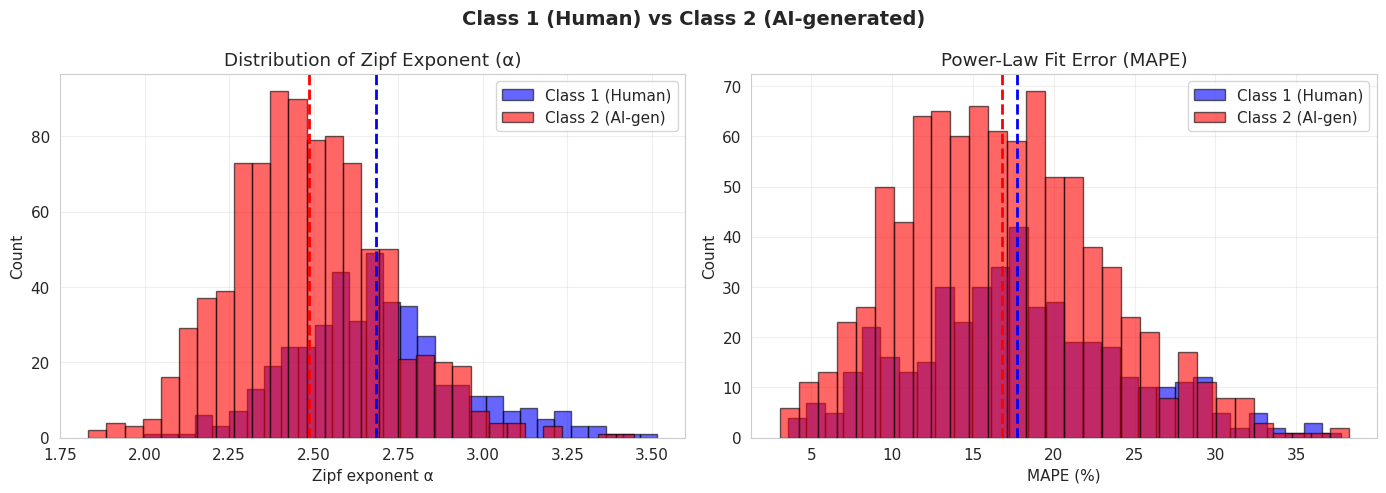

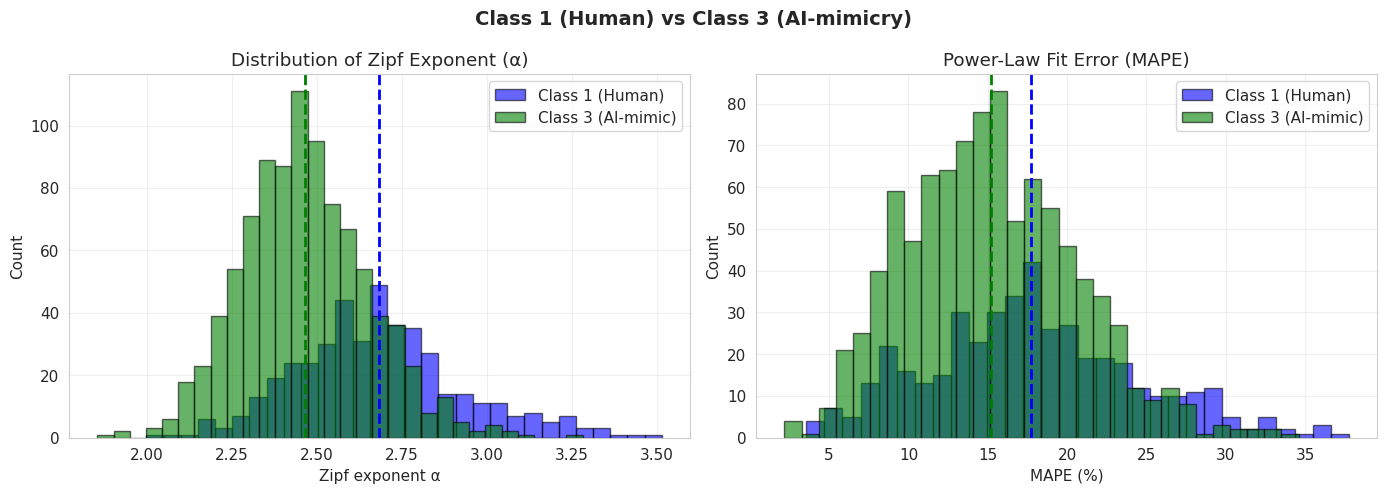

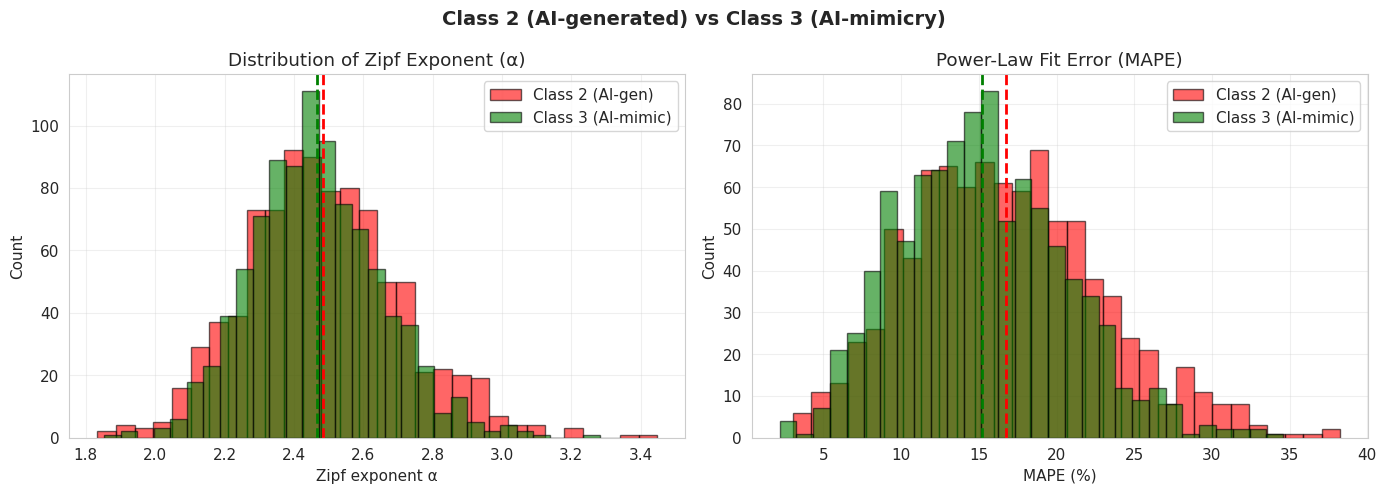

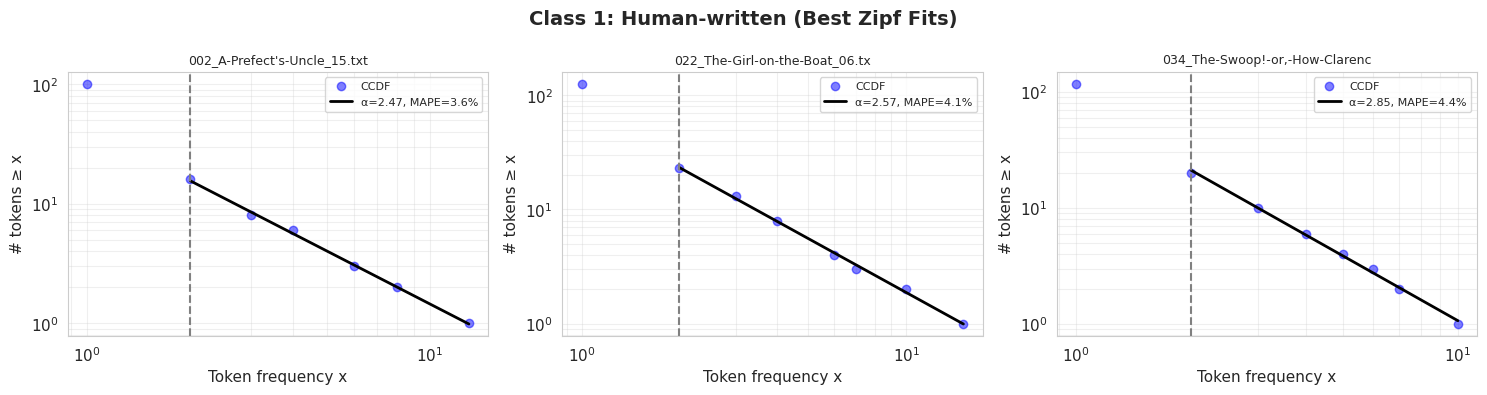

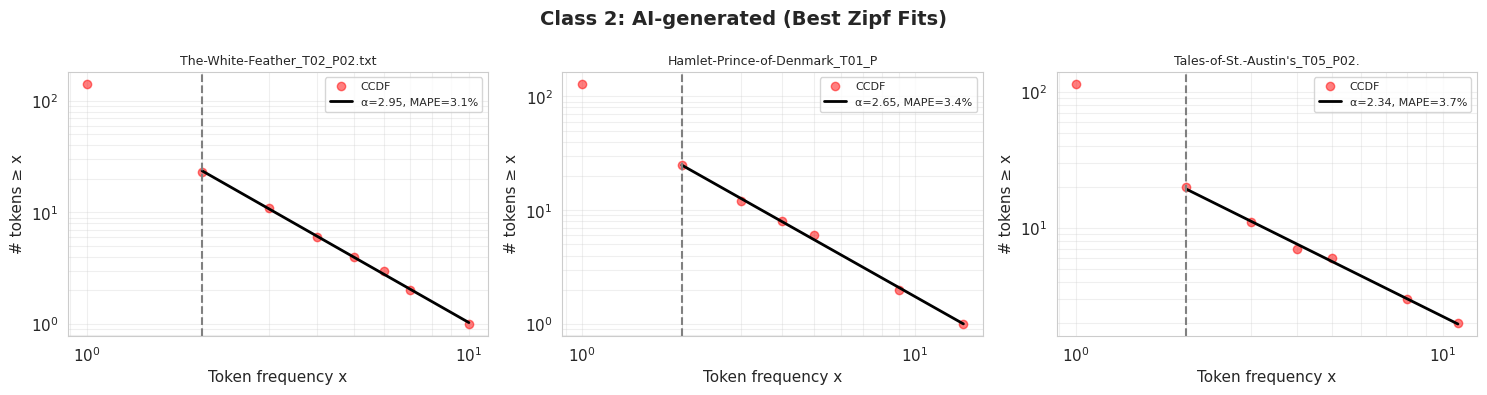

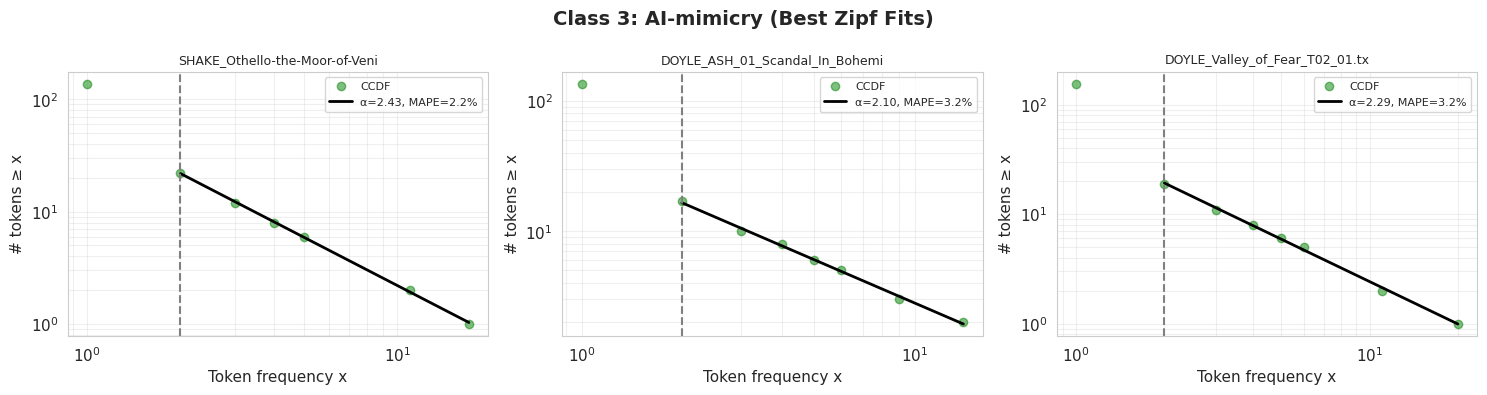

In [15]:
# Comparison of Zipf's Law across different text classes (OPTIMIZED)

import numpy as np
import json
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import linregress
import tiktoken

# ----------------------------
# CONFIG
# ----------------------------

CLASS1_DIR = DATASET_DIR / "class1-human-written"  # Human-written
CLASS2_DIR = DATASET_DIR / "class2-ai-written" / "ai-generated-paragraphs"  # AI-generated
CLASS3_DIR = DATASET_DIR / "class3-ai-mimicry"  # AI-mimicry

MIN_TOKENS = 50          # skip very short paragraphs
MAX_XMIN_FRAC = 0.3      # reduced from 0.5 for speed
MAX_CANDIDATES = 20      # limit number of xmin candidates to try

tokenizer = tiktoken.get_encoding("cl100k_base")

# ----------------------------
# CORE FUNCTIONS (OPTIMIZED)
# ----------------------------

def tokenize(text):
    return tokenizer.encode(text)

def cumulative_histogram(token_freq):
    """Optimized O(n log n) version using sorting"""
    freqs = np.array(list(token_freq.values()))
    freqs = np.sort(freqs)[::-1]  # Sort descending
    
    unique_freqs = np.unique(freqs)
    x = unique_freqs
    y = np.array([np.sum(freqs >= xi) for xi in x])
    
    return x, y

def fit_tail(x, y, xmin):
    mask = x >= xmin
    x_fit, y_fit = x[mask], y[mask]
    if len(x_fit) < 3:
        return None
    
    logx, logy = np.log(x_fit), np.log(y_fit)
    slope, intercept, *_ = linregress(logx, logy)
    
    k = -slope                # CCDF exponent
    alpha = k + 1.0           # Zipf exponent
    C = np.exp(intercept)
    
    y_pred = C * x_fit ** (-k)
    mape = np.mean(np.abs((y_fit - y_pred) / y_fit)) * 100
    
    return {
        "alpha": alpha,
        "k": k,
        "C": C,
        "xmin": xmin,
        "x_fit": x_fit,
        "y_fit": y_fit,
        "y_pred": y_pred,
        "mape": mape
    }

def best_fit_by_mape(x, y):
    """Optimized: limit number of candidates"""
    max_xmin_idx = int(len(x) * MAX_XMIN_FRAC)
    candidates = x[1:max_xmin_idx]
    
    # Subsample candidates if too many
    if len(candidates) > MAX_CANDIDATES:
        step = len(candidates) // MAX_CANDIDATES
        candidates = candidates[::step]
    
    best = None
    for xm in candidates:
        res = fit_tail(x, y, xm)
        if res is None:
            continue
        if best is None or res["mape"] < best["mape"]:
            best = res
    return best

def analyze_corpus(directory, max_files=None):
    """
    Analyze .txt files in directory or subdirectories.
    max_files: limit number of files to analyze (for speed)
    """
    results = []
    
    # Get all txt files recursively
    txt_files = list(directory.rglob("*.txt"))
    
    # Limit number of files if specified
    if max_files and len(txt_files) > max_files:
        print(f"  Limiting to {max_files} files out of {len(txt_files)} found")
        txt_files = txt_files[:max_files]
    
    for idx, file in enumerate(sorted(txt_files)):
        # Skip log and admin files
        if 'log' in file.name.lower() or 'admin' in file.name.lower():
            continue
        
        # Progress indicator
        if (idx + 1) % 100 == 0:
            print(f"  Processed {idx + 1}/{len(txt_files)} files...")
            
        try:
            text = file.read_text(encoding="utf-8").strip()
            tokens = tokenize(text)
            if len(tokens) < MIN_TOKENS:
                continue
            
            freq = Counter(tokens)
            x, y = cumulative_histogram(freq)
            
            if len(x) < 5:  # Need enough points to fit
                continue
                
            fit = best_fit_by_mape(x, y)
            if fit is None:
                continue
            
            results.append({
                "file": str(file.relative_to(directory)),
                "x": x,
                "y": y,
                "fit": fit
            })
        except Exception as e:
            # Silently skip problematic files
            continue
            
    return results

# ----------------------------
# RUN ANALYSIS
# ----------------------------

print("Analyzing Class 1 (Human-written)...")
class1_results = analyze_corpus(CLASS1_DIR, max_files=500)  # Limit for speed
print(f"Found {len(class1_results)} valid texts\n")

print("Analyzing Class 2 (AI-generated)...")
class2_results = analyze_corpus(CLASS2_DIR)
print(f"Found {len(class2_results)} valid texts\n")

print("Analyzing Class 3 (AI-mimicry)...")
class3_results = analyze_corpus(CLASS3_DIR)
print(f"Found {len(class3_results)} valid texts\n")

# Extract alpha and MAPE for each class
class1_alpha = [r["fit"]["alpha"] for r in class1_results]
class1_mape  = [r["fit"]["mape"]  for r in class1_results]

class2_alpha = [r["fit"]["alpha"] for r in class2_results]
class2_mape  = [r["fit"]["mape"]  for r in class2_results]

class3_alpha = [r["fit"]["alpha"] for r in class3_results]
class3_mape  = [r["fit"]["mape"]  for r in class3_results]

print("=== SUMMARY ===")
print(f"Class 1 (Human):    {len(class1_results)} texts")
print(f"Class 2 (AI-gen):   {len(class2_results)} texts")
print(f"Class 3 (AI-mimic): {len(class3_results)} texts")
print()
print("Alpha (Zipf exponent)")
print(f"  Class 1 mean={np.mean(class1_alpha):.3f}, std={np.std(class1_alpha):.3f}")
print(f"  Class 2 mean={np.mean(class2_alpha):.3f}, std={np.std(class2_alpha):.3f}")
print(f"  Class 3 mean={np.mean(class3_alpha):.3f}, std={np.std(class3_alpha):.3f}")
print()
print("MAPE (%)")
print(f"  Class 1 mean={np.mean(class1_mape):.2f}, std={np.std(class1_mape):.2f}")
print(f"  Class 2 mean={np.mean(class2_mape):.2f}, std={np.std(class2_mape):.2f}")
print(f"  Class 3 mean={np.mean(class3_mape):.2f}, std={np.std(class3_mape):.2f}")

# ----------------------------
# COMPARISON 1: Class 1 vs Class 2
# Human-written vs AI-generated
# ----------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Class 1 (Human) vs Class 2 (AI-generated)", fontsize=14, fontweight="bold")

# Alpha distribution
axes[0].hist(class1_alpha, bins=30, alpha=0.6, label="Class 1 (Human)", edgecolor="black", color="blue")
axes[0].hist(class2_alpha, bins=30, alpha=0.6, label="Class 2 (AI-gen)", edgecolor="black", color="red")
axes[0].axvline(np.mean(class1_alpha), linestyle="--", color="blue", linewidth=2)
axes[0].axvline(np.mean(class2_alpha), linestyle="--", color="red", linewidth=2)
axes[0].set_xlabel("Zipf exponent α")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Zipf Exponent (α)")
axes[0].legend()
axes[0].grid(alpha=0.3)

# MAPE distribution
axes[1].hist(class1_mape, bins=30, alpha=0.6, label="Class 1 (Human)", edgecolor="black", color="blue")
axes[1].hist(class2_mape, bins=30, alpha=0.6, label="Class 2 (AI-gen)", edgecolor="black", color="red")
axes[1].axvline(np.mean(class1_mape), linestyle="--", color="blue", linewidth=2)
axes[1].axvline(np.mean(class2_mape), linestyle="--", color="red", linewidth=2)
axes[1].set_xlabel("MAPE (%)")
axes[1].set_ylabel("Count")
axes[1].set_title("Power-Law Fit Error (MAPE)")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------
# COMPARISON 2: Class 1 vs Class 3
# Human-written vs AI-mimicry
# ----------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Class 1 (Human) vs Class 3 (AI-mimicry)", fontsize=14, fontweight="bold")

# Alpha distribution
axes[0].hist(class1_alpha, bins=30, alpha=0.6, label="Class 1 (Human)", edgecolor="black", color="blue")
axes[0].hist(class3_alpha, bins=30, alpha=0.6, label="Class 3 (AI-mimic)", edgecolor="black", color="green")
axes[0].axvline(np.mean(class1_alpha), linestyle="--", color="blue", linewidth=2)
axes[0].axvline(np.mean(class3_alpha), linestyle="--", color="green", linewidth=2)
axes[0].set_xlabel("Zipf exponent α")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Zipf Exponent (α)")
axes[0].legend()
axes[0].grid(alpha=0.3)

# MAPE distribution
axes[1].hist(class1_mape, bins=30, alpha=0.6, label="Class 1 (Human)", edgecolor="black", color="blue")
axes[1].hist(class3_mape, bins=30, alpha=0.6, label="Class 3 (AI-mimic)", edgecolor="black", color="green")
axes[1].axvline(np.mean(class1_mape), linestyle="--", color="blue", linewidth=2)
axes[1].axvline(np.mean(class3_mape), linestyle="--", color="green", linewidth=2)
axes[1].set_xlabel("MAPE (%)")
axes[1].set_ylabel("Count")
axes[1].set_title("Power-Law Fit Error (MAPE)")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------
# COMPARISON 3: Class 2 vs Class 3
# AI-generated vs AI-mimicry
# ----------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Class 2 (AI-generated) vs Class 3 (AI-mimicry)", fontsize=14, fontweight="bold")

# Alpha distribution
axes[0].hist(class2_alpha, bins=30, alpha=0.6, label="Class 2 (AI-gen)", edgecolor="black", color="red")
axes[0].hist(class3_alpha, bins=30, alpha=0.6, label="Class 3 (AI-mimic)", edgecolor="black", color="green")
axes[0].axvline(np.mean(class2_alpha), linestyle="--", color="red", linewidth=2)
axes[0].axvline(np.mean(class3_alpha), linestyle="--", color="green", linewidth=2)
axes[0].set_xlabel("Zipf exponent α")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Zipf Exponent (α)")
axes[0].legend()
axes[0].grid(alpha=0.3)

# MAPE distribution
axes[1].hist(class2_mape, bins=30, alpha=0.6, label="Class 2 (AI-gen)", edgecolor="black", color="red")
axes[1].hist(class3_mape, bins=30, alpha=0.6, label="Class 3 (AI-mimic)", edgecolor="black", color="green")
axes[1].axvline(np.mean(class2_mape), linestyle="--", color="red", linewidth=2)
axes[1].axvline(np.mean(class3_mape), linestyle="--", color="green", linewidth=2)
axes[1].set_xlabel("MAPE (%)")
axes[1].set_ylabel("Count")
axes[1].set_title("Power-Law Fit Error (MAPE)")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------
# VISUALIZATION: Example CCDFs (side-by-side)
# ----------------------------

def plot_examples(results, title, n=3, color='blue'):
    if len(results) == 0:
        print(f"No results for {title}")
        return
        
    chosen = sorted(results, key=lambda r: r["fit"]["mape"])[:min(n, len(results))]
    fig, axes = plt.subplots(1, len(chosen), figsize=(5*len(chosen), 4))
    if len(chosen) == 1:
        axes = [axes]
    fig.suptitle(title, fontsize=14, fontweight="bold")
    
    for ax, r in zip(axes, chosen):
        x, y = r["x"], r["y"]
        f = r["fit"]
        
        ax.loglog(x, y, 'o', alpha=0.5, label="CCDF", color=color)
        ax.loglog(f["x_fit"], f["y_pred"], '-', linewidth=2,
                  label=f"α={f['alpha']:.2f}, MAPE={f['mape']:.1f}%", color='black')
        ax.axvline(f["xmin"], linestyle="--", color="gray")
        ax.set_xlabel("Token frequency x")
        ax.set_ylabel("# tokens ≥ x")
        ax.legend(fontsize=8)
        ax.grid(alpha=0.3, which="both")
        ax.set_title(r["file"].split('/')[-1][:30], fontsize=9)
    
    plt.tight_layout()
    plt.show()

plot_examples(class1_results, "Class 1: Human-written (Best Zipf Fits)", color='blue')
plot_examples(class2_results, "Class 2: AI-generated (Best Zipf Fits)", color='red')
plot_examples(class3_results, "Class 3: AI-mimicry (Best Zipf Fits)", color='green')

#### Results

It is important to remember that the AI generated text was generated intentionally with a high temperature.

Overall, the graphs seem to show that the alpha values in Zipf's law is lower in AI than in humans. The reason (again) can be primarily attributed to the temperature, I would assume. Since the temperature is 1.0, it tends to take words from the tail end of the distribution (since it's more or less "forced" not to take the most prominent word).


#### My explanation of the weirdness of AI having higher TTR but lower Zipf alpha than humans on average

| Metric      | Human (Class 1) | AI (Class 2 & 3) | Explanation                                                                                                                                                                              |
| ----------- | --------------- | ---------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| TTR (lower) | Lower           | Higher           | AI uses more unique words per paragraph because it avoids repetitive connective tissue (pronouns/function words) humans need for narrative cohesion. image.jpg​                          |
| Zipf (α)    | Higher (-2.7)   | Lower (-2.5)     | Because AI boosts probability of rare words (due to TTR), the frequency gap between "the" and "unique word" is smaller. The distribution is flatter, creating a heavier tail. image.jpg​ |

---
---
---

## Syntactic Complexity